**Visualize all tracks in file '2017-05-18_00h_tracks.csv',   allowed area for host : [[[-10, -25],[30, -25]],[[-10, 20],[30, 20]]] :**

In [3]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import csv

num_TOs = 1500

# Loading original tracks data:
cols = ['ID','Time','x', 'y','Speed','Type','Estimated']
data = pd.read_csv('2017-04-28_00h_tracks.csv',index_col=False, header=None,sep=';',names=cols )
data = data.drop(data.index[0])   # drops the first row
df = data[(data['Type'] == 2)]  # only selecting TO of type 2 (car)


# creating new data frame for plotting trajectories: 
df = df[['ID', 'Time','x', 'y']]

print(df.head())

# path to to put saved file:
path = r'C:\Users\Katarina Tran\Desktop\CAS\Project_course_math_stat_modelling\2017_04_28_R'

# the file is currently named 'selected_path.csv':
df.to_csv(os.path.join(path, r'xy_all.csv'), index=False)

print('Selected paths saved to csv !')

              ID                              Time        x        y
135892  10015967  2017-04-28 07:43:46.736000+02:00 -29.0657 -16.0746
135893  10015967  2017-04-28 07:43:46.988000+02:00 -28.7542 -15.7451
135894  10015967  2017-04-28 07:43:47.241000+02:00 -28.5022 -15.4234
135895  10015967  2017-04-28 07:43:47.494000+02:00 -28.1564 -15.0854
135896  10015967  2017-04-28 07:43:47.746000+02:00 -27.7036 -14.7478
Selected paths saved to csv !


## Selecting x-y coordinates which only contain RIGHT turn in '2017-04-28_00h_tracks.csv' 

In [46]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import csv

#num_TOs = 1500
x_left_bound = 5
x_right_bound = 33
y_upper_bound = -30
y_lower_bound = 2

x_condition_2 = 22
y_condition_2 = -15
theta = -0.523

# Loading original tracks data:
cols = ['ID','Time','x', 'y','Speed','Type','Estimated']
data = pd.read_csv('2017-04-28_00h_tracks.csv',index_col=False, header=None,sep=';',names=cols )
data = data.drop(data.index[0])   # drops the first row
df1 = data[(data['Type'] == 2)]  # only selecting TO of type 2 (car)

# rotate x-y-coordinates by theta to align the road with the x-y axis in the map:
df1['x_rot'] = df1['x'].multiply(np.cos(theta)) - df1['y'].multiply(np.sin(theta))
df1['y_rot'] = df1['x'].multiply(np.sin(theta)) + df1['y'].multiply(np.cos(theta))


# creating new data frame for plotting trajectories: 
df = pd.DataFrame(columns=['ID', 'Time', 'x', 'y'])

grouped = df1.groupby(['ID'])   # selecting only TO ID:s that fullfill x-y coord. condition for right turn
for ID,group in grouped:

    df_temp = pd.DataFrame({'x_cond':group['x'].between(x_left_bound, x_right_bound),
                            #'y_cond':group['y'].between(y_upper_bound, y_lower_bound),
                            'x_cond2':(group['x'] > 6).all()
                            ,'x_cond3':not(group['x'] <= 8).any()
                            ,'x_cond4':not(group['x_rot'] < 0).any()
                            ,'y_cond2':(group['y'] < -15).any()
                           })
    
    if df_temp.all(axis=None):   # if boundary conditions for x and y are fullfilled
        df = df.append(group[['ID','Time','x','y']])
#df = df.rename(columns={"x_rot": "x", "y_rot": "y"})
#df = df.iloc[:,[0,1,3,5]]
print(df.head())
# path to to put saved file:
path = r'C:\Users\Katarina Tran\Desktop\CAS\Project_course_math_stat_modelling\2017_04_28_R'

# the file is currently named 'selected_path.csv':
df.to_csv(os.path.join(path, r'xy_R_2017_04_28_filtered.csv'), index=False)

print('Selected paths saved to csv !')

C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


              ID                              Time        x         y
136762  10016061  2017-04-28 07:45:45.439000+02:00  12.7779   1.91187
136763  10016061  2017-04-28 07:45:45.692000+02:00  11.8095  0.278065
136764  10016061  2017-04-28 07:45:46.092000+02:00  11.4174  -1.74244
136765  10016061  2017-04-28 07:45:46.344000+02:00  11.0067  -3.90082
136766  10016061  2017-04-28 07:45:46.598000+02:00  11.0251  -6.41331
Selected paths saved to csv !


**Selecting state vector (RIGHT turn) which corresponds in time with xy-file cut in approximately same position :**

In [3]:
'''
coordinates for restricted area in 'result_R.csv' is : [[[-10, -25],[30, -25]],[[-10, 20],[30, 20]]]
'''
import pandas as pd
from pandas import DataFrame
import numpy as np
from datetime import datetime
from datetime import timedelta
import os

minimum_sequence = 15  # sequence of xy-trajectories for map plotting 
# num_TOs = 1500

# Loading file which contains x-y coord for right turn paths:
cols = ['ID','Time','x','y']
data1 = pd.read_csv(r'C:\Users\Katarina Tran\Desktop\CAS\Project_course_math_stat_modelling\2017_04_28_R\xy_right_turn.csv',index_col=False, header=None,sep=',',names=cols )
data1 = data1.drop(data1.index[0])   # drops the first row
#df1 = data1[(data1['Type'] == 2)]  # only selecting TO of type 2 (car), allready filltered out above
df1 = data1
df1['Time'] = pd.to_datetime(df1['Time']) 
df1['Time'] = df1['Time'].astype('datetime64[ns]')
df1['ID'] = df1['ID'].astype('int32')
df1['ID'] = pd.to_numeric(df1['ID'])
df1['x_numeric'] = pd.to_numeric(df1['x'])

# deleting xy-rows which has x-coord. above 18:
indexRows = df1[ df1['x_numeric'] >= 18].index
df1.drop(indexRows , inplace=True)
del df1['x_numeric']
# Loading data with occupancy grid:
data2 = pd.read_csv('result_2017_04_28_R_large.csv')
data2['ID'] = data2['Object id']
del data2['Object id']
del data2['State time']

# choosing random TO IDs in df2:
#TO_unique = df2.ID.unique()
#rand_ID = np.random.choice(TO_unique, num_TOs, replace=False)
#df2 = df2.loc[df2['ID'].isin(rand_ID)]

# choosing ID:s in df2 that also exists in df1:
df2 = data2.loc[data2['ID'].isin(df1['ID'])]
df2['ID'] = df2['ID'].astype(float)
#print(df2.dtypes)
# choosing ID:s in df1 that is also existing in df2:
df1 = df1.loc[df1['ID'].isin(df2['ID'])]

# check if they have identical ID:s:
#ID_df1 = df1.ID.unique()
#ID_df2 = df2.ID.unique()
#ID_df1 = np.sort(ID_df1, axis=None)
#ID_df2 = np.sort(ID_df2, axis=None)
#print(np.array_equal(ID_df1, ID_df2))


# calculating state time for data containing occupancy grid:
df2['Time id'] = df2['Time id'].astype(float)
start_time = pd.to_datetime('2017-04-28 00:23:04.376') 
df2['State time'] = start_time + timedelta(seconds=0.3)*df2['Time id'] - timedelta(hours=2) - timedelta(seconds=5.5)


#df2['Time_id_unique'] = (df2['Time id'].diff() != 1).cumsum()  # rows with consequtive increasing values gets same index


# creating new data frame for plotting trajectories in map: 
df = pd.DataFrame(columns=['ID', 'Time', 'x', 'y'])

# creating empty data frame for state vector:
df_state = pd.DataFrame()

# selecting x-y data that corresponds to the output from GridExtractor (for visualization of tracks in map)
# also selecting the corresponding state vectors stored in df_state for clustering:
grouped = df1.groupby(['ID'])  
for ID,group in grouped:
    df_temp = df2.loc[df2['ID'] == ID]
    df_temp = df_temp[(df_temp['State time'] >= group['Time'].iloc[0]) & (df_temp['State time'] <= group['Time'].iloc[-1])]
    if len(df_temp.index) > 9:    # only using ID:s containing more than 9 data points
        df = df.append(group)
        df_state = df_state.append(df_temp)
    #print('**********************')
    #print(ID)
    #print(group)    
    #print(group['State_time'].iloc[0]  )
    #print(group['State_time'].iloc[-1])
    #print('**************************')
    #print(df_temp)
    #print(len(df_temp.index))

# path to to put saved file:
path = r'C:\Users\Katarina Tran\Desktop\CAS\Project_course_math_stat_modelling\2017_04_28_R'

# the file is currently named 'xy_right_time_matching.csv':
df.to_csv(os.path.join(path, r'xy_right_time_matching_cut.csv'), index=False)

# the file is currently named 'state_vector_right_turn.csv':
df_state.to_csv(os.path.join(path, r'state_vector_right_turn_cut.csv'), index=False)

print('Selected paths saved to csv !')


C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

Selected paths saved to csv !


**Selecting right turn paths from the file above that corresponds to the time interval calculated from the GridExtractor, also choosing the data from GridExtractor that matches with the file above  :**

In [4]:
'''
coordinates for restricted area in 'result_R.csv' is : [[[-10, -25],[30, -25]],[[-10, 20],[30, 20]]]
'''
import pandas as pd
from pandas import DataFrame
import numpy as np
from datetime import datetime
from datetime import timedelta
import os

minimum_sequence = 15  # sequence of xy-trajectories for map plotting 
# num_TOs = 1500

# Loading file which contains x-y coord for right turn paths:
cols = ['ID','Time','x','y']
data1 = pd.read_csv(r'C:\Users\Katarina Tran\Desktop\CAS\Project_course_math_stat_modelling\2017_04_28_R\xy_right_turn.csv',index_col=False, header=None,sep=',',names=cols )
data1 = data1.drop(data1.index[0])   # drops the first row
#df1 = data1[(data1['Type'] == 2)]  # only selecting TO of type 2 (car), allready filltered out above
df1 = data1
df1['Time'] = pd.to_datetime(df1['Time']) 
df1['Time'] = df1['Time'].astype('datetime64[ns]')
df1['ID'] = df1['ID'].astype('int32')
df1['ID'] = pd.to_numeric(df1['ID'])

# Loading data with occupancy grid:
data2 = pd.read_csv('result_2017_04_28_R_large.csv')
data2['ID'] = data2['Object id']
del data2['Object id']
del data2['State time']

# choosing random TO IDs in df2:
#TO_unique = df2.ID.unique()
#rand_ID = np.random.choice(TO_unique, num_TOs, replace=False)
#df2 = df2.loc[df2['ID'].isin(rand_ID)]

# choosing ID:s in df2 that also exists in df1:
df2 = data2.loc[data2['ID'].isin(df1['ID'])]
df2['ID'] = df2['ID'].astype('int32')
#print(df2.dtypes)
# choosing ID:s in df1 that is also existing in df2:
df1 = df1.loc[df1['ID'].isin(df2['ID'])]

# check if they have identical ID:s:
#ID_df1 = df1.ID.unique()
#ID_df2 = df2.ID.unique()
#ID_df1 = np.sort(ID_df1, axis=None)
#ID_df2 = np.sort(ID_df2, axis=None)
#print(np.array_equal(ID_df1, ID_df2))


# calculating state time for data containing occupancy grid:
df2['Time id'] = df2['Time id'].astype(float)
start_time = pd.to_datetime('2017-04-28 00:23:04.376') 
df2['State time'] = start_time + timedelta(seconds=0.3)*df2['Time id'] - timedelta(hours=2) - timedelta(seconds=5.5)


#df2['Time_id_unique'] = (df2['Time id'].diff() != 1).cumsum()  # rows with consequtive increasing values gets same index


# creating new data frame for plotting trajectories in map: 
df = pd.DataFrame(columns=['ID', 'Time', 'x', 'y'])

# creating empty data frame for state vector:
df_state = pd.DataFrame()

# selecting x-y data that corresponds to the output from GridExtractor (for visualization of tracks in map)
# also selecting the corresponding state vectors stored in df_state for clustering:
grouped = df2.groupby(['ID'])  
for ID,group in grouped:
    df_temp = df1.loc[df1['ID'] == ID, ['ID', 'Time', 'x', 'y']]
    df_temp = df_temp[(df_temp['Time'] >= group['State time'].iloc[0]) & (df_temp['Time'] <= group['State time'].iloc[-1])]
    if len(df_temp.index) > 9:    # only using ID:s containing more than 30 data points
        df = df.append(df_temp)
        df_state = df_state.append(group)
    #print('**********************')
    #print(ID)
    #print(group)    
    #print(group['State_time'].iloc[0]  )
    #print(group['State_time'].iloc[-1])
    #print('**************************')
    #print(df_temp)
    #print(len(df_temp.index))

# path to to put saved file:
path = r'C:\Users\Katarina Tran\Desktop\CAS\Project_course_math_stat_modelling\2017_04_28_R'

# the file is currently named 'xy_right_time_matching.csv':
df.to_csv(os.path.join(path, r'xy_right_time_matching.csv'), index=False)

# the file is currently named 'state_vector_right_turn.csv':
df_state.to_csv(os.path.join(path, r'state_vector_right_turn.csv'), index=False)

print('Selected paths saved to csv !')


C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

Selected paths saved to csv !


##  Creating 3D plot with state vectors and xy-file for trajectory plotting (right turn):

<IPython.core.display.Javascript object>


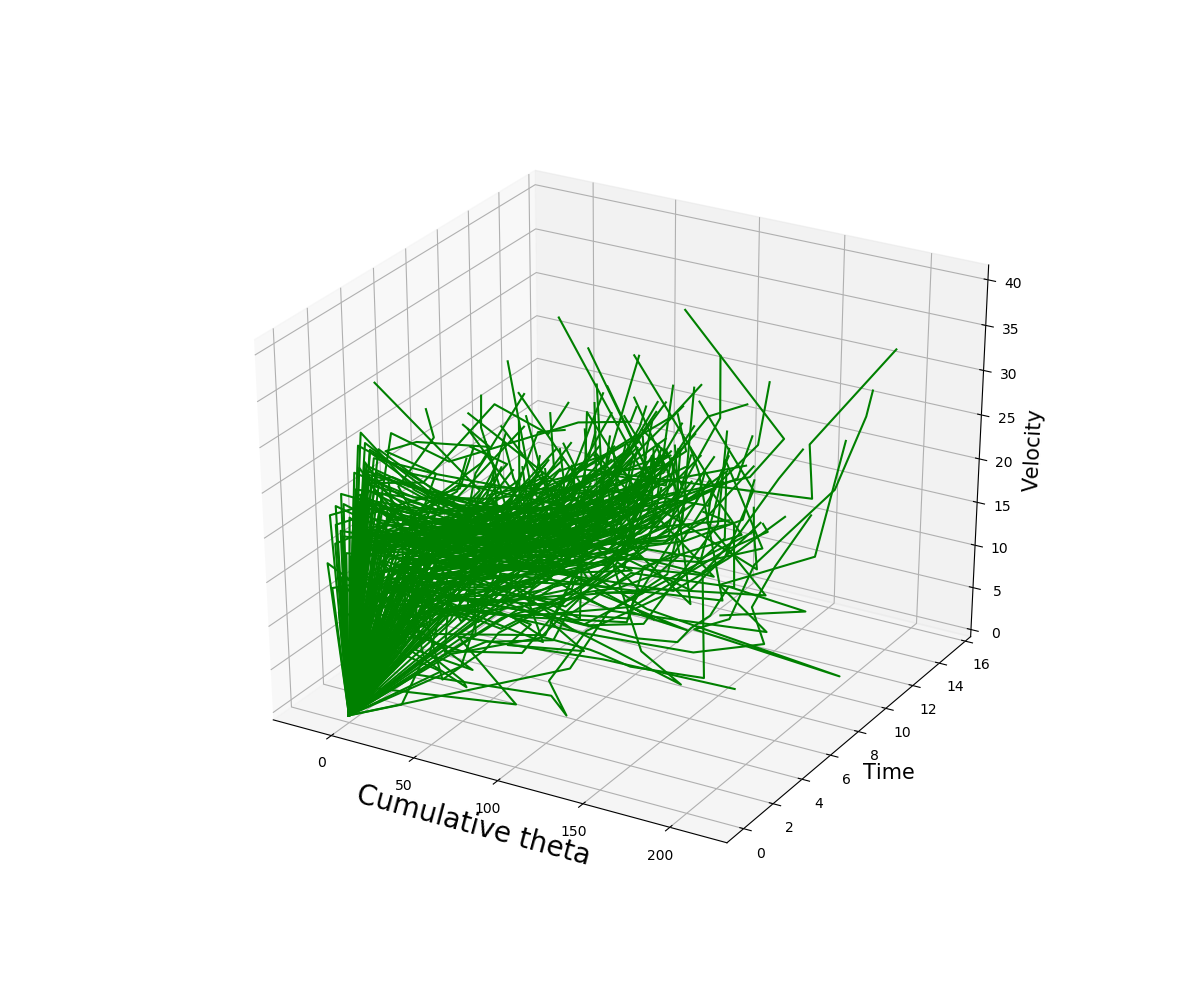

C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [6]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv
%matplotlib notebook

plot_step = 3   # specify here the n:th number of step that will be used in the plot ( this is to remove noice)
                    # if plot_step = 1 all data points will be used

# Loading file which contains x-y coord for right turn paths:
cols = ['ID','Time','x','y']
xy_data = pd.read_csv(r'C:\Users\Katarina Tran\Desktop\CAS\Project_course_math_stat_modelling\2017_04_28_R\xy_R_2017_04_28_filtered.csv',index_col=False, header=None,sep=',',names=cols )
df_xy = xy_data
df_xy = df_xy.drop(df_xy.index[0])   # drops the first row

# Loading file which contains state vector for right turn paths:
state_data = pd.read_csv(r'C:\Users\Katarina Tran\Desktop\CAS\Project_course_math_stat_modelling\2017_04_28_R\state_vect_R_2017_04_28.csv',index_col=False, header=None,sep=',')
df_state = state_data
df_state.columns = df_state.iloc[0]
df_state = df_state.drop(df_state.index[0])   # drops the first row
df_state['Delta theta'] = df_state['Delta theta'].astype(float)
df_state['Velocity'] = df_state['Velocity'].astype(float)
#print(df_test.dtypes)
fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')

# creating empty data frame to store path where outliers are removed (needed to plot paths in map):
df_map = pd.DataFrame()
df_filtered = pd.DataFrame()

grouped = df_state.groupby(['ID'])  
for ID,group in grouped:
    theta = group['Delta theta']
    theta = theta.to_numpy()
    theta = np.insert(theta,0,0)
    theta = theta*180/np.pi
    theta = np.cumsum(theta) 
    theta_sum = theta[-1]
    if not((theta > 220).any() or (theta < -20).any()):  # filtering out outliers for cumulative theta values 
        time = np.arange(len(group)+1)*0.3
        time_last = time[-1]
        velocity = group['Velocity'].to_numpy()
        velocity = np.insert(velocity,0,0)
        v_plot = velocity[-1]
        plot_data = pd.DataFrame({'Velocity': velocity, 'Cum_theta': theta, 'Time': time})
        time_plot = plot_data['Time'].iloc[::plot_step].to_numpy()
        velocity_plot = plot_data['Velocity'].iloc[::plot_step].to_numpy()
        theta_plot = plot_data['Cum_theta'].iloc[::plot_step].to_numpy()
        ax.plot3D(theta_plot, time_plot,velocity_plot, 'green')
        df_temp = df_xy.loc[df_xy['ID'] == ID, ['ID', 'Time', 'x', 'y']]
        df_map = df_map.append(df_temp)
        df_temp2 = pd.DataFrame({'cumulative theta': theta[1:len(theta)],'time elapsed': time[1:len(time)]})
        group['theta plot'] = theta_sum
        group['time plot'] = time_last
        group['v plot'] = v_plot
        group = group.reset_index(drop=True)
        group = pd.concat([df_temp2,group], axis=1)
        df_filtered = df_filtered.append(group)
              
# label axes
ax.set_xlabel('Cumulative theta', fontsize=20)
ax.set_ylabel('Time', fontsize=15)
ax.set_zlabel('Velocity', fontsize=15)
plt.show()

# path to to put saved file:
path = r'C:\Users\Katarina Tran\Desktop\CAS\Project_course_math_stat_modelling\2017_04_28_R'

# the file is currently named 'xy_right_time_matching.csv':
df_map.to_csv(os.path.join(path, r'xy_R_filtered_2017_04_28.csv'), index=False)

# the file is currently named 'state_vector_right_turn.csv':
df_filtered.to_csv(os.path.join(path, r's_vect_R_2017_04_28.csv'), index=False)



**Visualizing ocupation matrix for pedestrians and other vehicles in form of table :**

In [19]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv

# Loading file which contains state vector for right turn paths:
state_data = pd.read_csv(r'C:\Users\Katarina Tran\Desktop\CAS\Project_course_math_stat_modelling\2017_04_28_R\state_vector_R_filtered.csv',index_col=False, header=None,sep=',')
df_state = state_data
df_state.columns = df_state.iloc[0]
df_state = df_state.drop(df_state.index[0])   # drops the first row

# checking number of detected pedestrians in the occupancy grid, for cells surrounding vehicle:
print('num. occurence P_11: \n' + str(df_state['P_11'].value_counts()))  
print('num. occurence P_12: \n' + str(df_state['P_12'].value_counts()))    
print('num. occurence P_13: \n' + str(df_state['P_13'].value_counts()))

print('num. occurence P_21: \n' + str(df_state['P_21'].value_counts()))
print('num. occurence P_31: \n' + str(df_state['P_31'].value_counts()))
print('num. occurence P_32: \n' + str(df_state['P_32'].value_counts()))
print('num. occurence P_33: \n' + str(df_state['P_33'].value_counts())) 

print('num. occurence P_23: \n' + str(df_state['P_23'].value_counts()))

print('\n')
# checking number of other vehicles in occupation matrix:
print('num. occurence V_11: \n' + str(df_state['V_11'].value_counts()))  
print('num. occurence V_12: \n' + str(df_state['V_12'].value_counts()))    
print('num. occurence V_13: \n' + str(df_state['V_13'].value_counts()))

print('num. occurence V_21: \n' + str(df_state['V_21'].value_counts()))
print('num. occurence V_31: \n' + str(df_state['V_31'].value_counts()))
print('num. occurence V_32: \n' + str(df_state['V_32'].value_counts()))
print('num. occurence V_33: \n' + str(df_state['V_33'].value_counts())) 

print('num. occurence V_23: \n' + str(df_state['V_23'].value_counts()))


#print(df_state['ID'].loc[df_state['P_13'] == '1.0'])
#print(df_state['ID'].loc[df_state['P_12'] == '1.0'])
#print(df_state['ID'].loc[df_state['P_11'] == '1.0'])  # non were found in 'P_11'

num. occurence P_11: 
0.0    2780
1.0      33
Name: P_11, dtype: int64
num. occurence P_12: 
0.0    2789
1.0      24
Name: P_12, dtype: int64
num. occurence P_13: 
0.0    2624
1.0     189
Name: P_13, dtype: int64
num. occurence P_21: 
0.0    2780
1.0      33
Name: P_21, dtype: int64
num. occurence P_31: 
0.0    2758
1.0      55
Name: P_31, dtype: int64
num. occurence P_32: 
0.0    2802
1.0      11
Name: P_32, dtype: int64
num. occurence P_33: 
0.0    2691
1.0     122
Name: P_33, dtype: int64
num. occurence P_23: 
0.0    2468
1.0     345
Name: P_23, dtype: int64


num. occurence V_11: 
0.0    2673
1.0     140
Name: V_11, dtype: int64
num. occurence V_12: 
0.0    2696
1.0     117
Name: V_12, dtype: int64
num. occurence V_13: 
0.0    2706
1.0     107
Name: V_13, dtype: int64
num. occurence V_21: 
0.0    2696
1.0     117
Name: V_21, dtype: int64
num. occurence V_31: 
0.0    2725
1.0      88
Name: V_31, dtype: int64
num. occurence V_32: 
0.0    2714
1.0      99
Name: V_32, dtype: int64
num.

**Checking occupation matrix if contains specific scenarios (turning right with other cars approaching) :**

In [165]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv

# Loading file which contains state vector for right turn paths:
state_data = pd.read_csv(r'C:\Users\Katarina Tran\Desktop\CAS\Project_course_math_stat_modelling\2017_04_28_R\state_vector_R_filtered.csv',index_col=False, header=None,sep=',')
df_state = state_data
df_state.columns = df_state.iloc[0]
df_state = df_state.drop(df_state.index[0])   # drops the first row
df_state['index'] = df_state.index
#print(df_state.head())
#print(df_state.dtypes)
# creating empty data frame for state vector:
df_ped_LR = pd.DataFrame(columns=['ID'])
df_ped_RL = pd.DataFrame(columns=['ID'])
index_list = []

grouped = df_state.groupby(['ID'])  
for ID,group in grouped:
    if ((group['V_11'] == '1.0').any() and (group['V_12'] == '1.0').any() and (group['V_13'] == '1.0').any()):
        #index_L = group['index'].loc[group['P_11'].iloc[0]].values
        #index_R = group['index'].loc[group['P_13'].iloc[0]].values
        #if index_L >= index_R:
        #    df_ped_LR = df_ped_LR.append(group)
        #else:
        #    df_ped_RL = df_ped_RL.append(group)
        print('other vehicle in front : \n' + str(ID))
    if ((group['V_11'] == '1.0').any() and (group['V_21'] == '1.0').any() and (group['V_32'] == '1.0').any()):
        print('other vehicle in back ************* : \n' + str(ID))



other vehicle in back ************* : 
10019787
other vehicle in front : 
10024752
other vehicle in back ************* : 
10038666
other vehicle in back ************* : 
10041757
other vehicle in front : 
10047560
other vehicle in front : 
10047737
other vehicle in front : 
10051749
other vehicle in back ************* : 
10051749
other vehicle in back ************* : 
10053707
other vehicle in back ************* : 
10054648
other vehicle in front : 
10060696
other vehicle in back ************* : 
10060815
other vehicle in back ************* : 
10061600
other vehicle in front : 
10062539
other vehicle in front : 
10063852
other vehicle in back ************* : 
10065554
other vehicle in back ************* : 
10066420
other vehicle in back ************* : 
10067595
other vehicle in back ************* : 
10071692
other vehicle in back ************* : 
10078424
other vehicle in back ************* : 
10088357


**RIGHT TURN (note: Plotting state vector with larger time interval removes unwanted noices and makes it easier to detect scenarios) Producing scatter plot for visualizing other vehicles, for a single host vehicle in each plot 
ID = '10024752' , '10047560', '10047737' :**

<IPython.core.display.Javascript object>


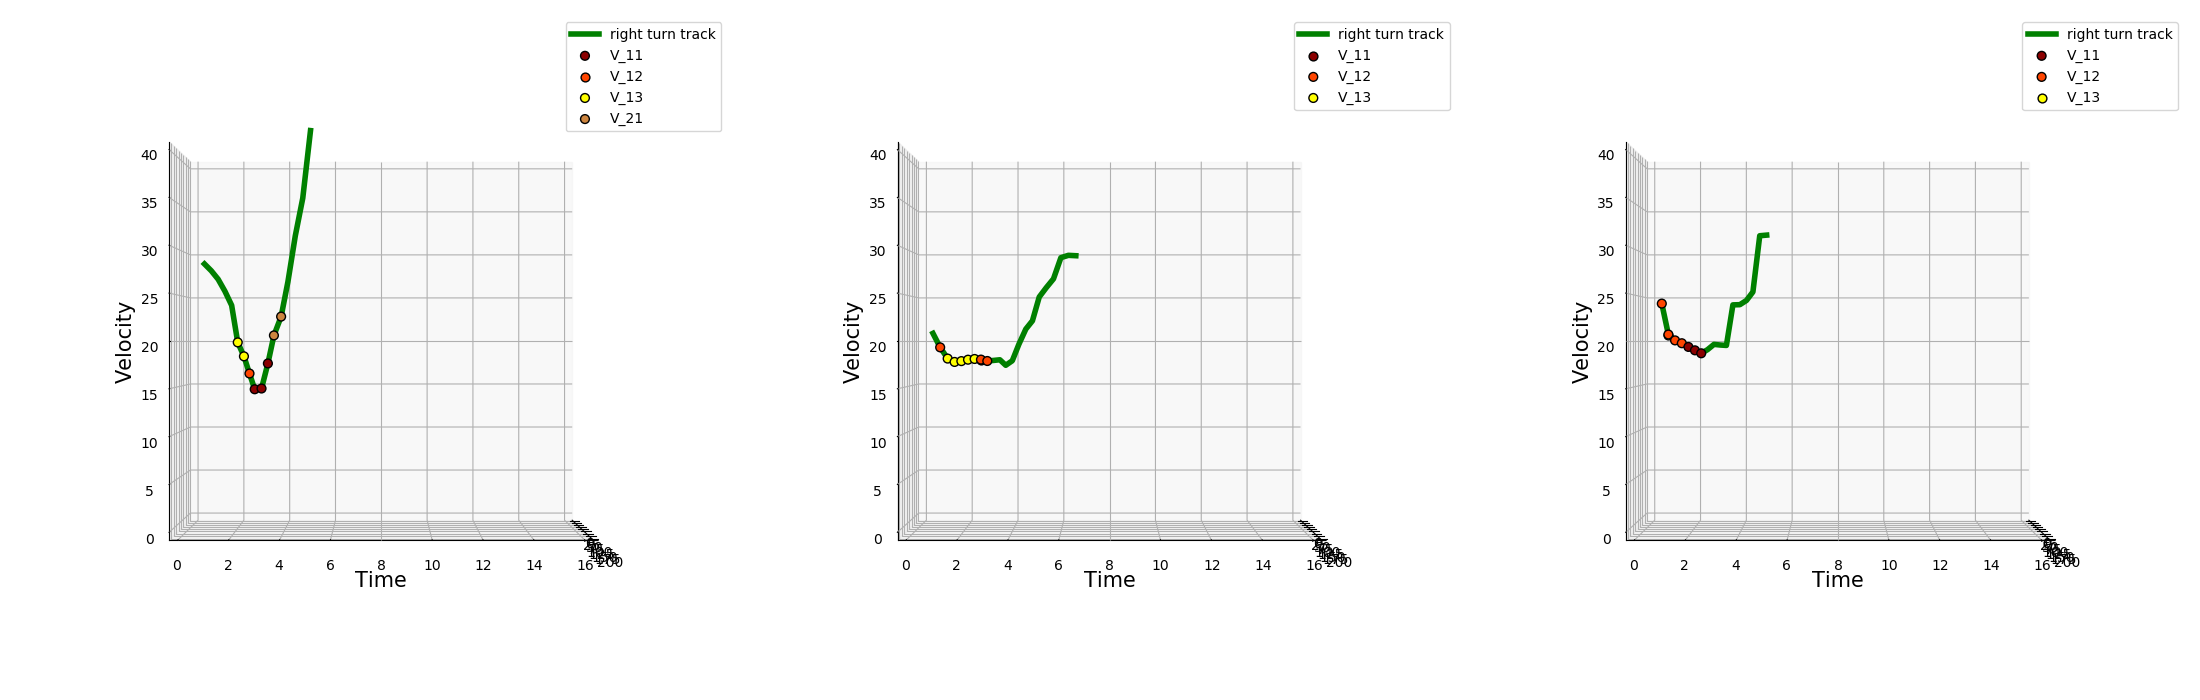

C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [328]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv
%matplotlib notebook

plot_number = 130
plot_step = 1   # specify here the n:th number of step that will be used in the plot ( this is to remove noice)
                    # if plot_step = 1 all data points will be used

# Loading file which contains state vector for right turn paths:
state_data = pd.read_csv(r'C:\Users\Katarina Tran\Desktop\CAS\Project_course_math_stat_modelling\2017_04_28_R\state_vector_R_filtered.csv',index_col=False, header=None,sep=',')
df_state = state_data
df_state.columns = df_state.iloc[0]
df_state = df_state.drop(df_state.index[0])   # drops the first row

df_state['cumulative theta'] = df_state['cumulative theta'].astype(float)
df_state['Velocity'] = df_state['Velocity'].astype(float)
df_state['time elapsed'] = df_state['time elapsed'].astype(float)

fig = plt.figure(figsize=(22,7))

# prepare scatter data for detecting pedestrians in occupancy plot:
df_scatter1 = df_state.loc[df_state['V_11'] == '1.0']
df_scatter1['color'] = 'darkred'
df_scatter1['label'] = 'V_11'
df_scatter2 = df_state.loc[df_state['V_12'] == '1.0']
df_scatter2['color'] = 'orangered'
df_scatter2['label'] = 'V_12'
df_scatter3 = df_state.loc[df_state['V_13'] == '1.0']
df_scatter3['color'] = 'yellow'
df_scatter3['label'] = 'V_13'

df_scatter4 = df_state.loc[df_state['V_21'] == '1.0']
df_scatter4['color'] = 'peru'
df_scatter4['label'] = 'V_21'

df_scatter5 = df_state.loc[df_state['V_31'] == '1.0']
df_scatter5['color'] = 'saddlebrown'
df_scatter5['label'] = 'V_31'

df_scatter = df_scatter1.append(df_scatter2)
df_scatter = df_scatter.append(df_scatter3)
df_scatter = df_scatter.append(df_scatter4)
df_scatter = df_scatter.append(df_scatter5)



grouped = df_state.groupby(['ID'])  
for ID,group in grouped:
    if ID == '10024752' or ID=='10047560' or ID == '10047737':
        group = group.reset_index()
        # set up the axes for the subplot
        plot_number = plot_number +1
        ax = fig.add_subplot(plot_number, projection='3d')
        ax.view_init(azim=360, elev=0)
        ax.set_xlim3d(0, 210)
        ax.set_ylim3d(0,16)
        ax.set_zlim3d(0,40)
        df_plot = group[['cumulative theta','time elapsed', 'Velocity']]
        df_plot = df_plot.iloc[::plot_step]
        theta = df_plot['cumulative theta'].to_numpy()
        time = df_plot['time elapsed'].to_numpy()
        velocity = df_plot['Velocity'].to_numpy()
        ax.plot3D(theta, time,velocity,'green',label ='right turn track',linewidth=4)
        # scatterplot:
        df_plot2 = df_scatter.loc[df_scatter['ID'] == ID]
        grouped_scatter = df_plot2.groupby(['label'])
        for label,group in grouped_scatter:
            theta = group['cumulative theta'].to_numpy()
            velocity = group['Velocity'].to_numpy()
            time = group['time elapsed'].to_numpy()
            #track_label = pd.Series('right turn track')
            plot_label = label
            ax.scatter3D(theta, time,velocity, s=40, c= group['color'],label=plot_label, edgecolors= 'black', alpha= 1)
        ax.legend()
            # label axes
    #ax.set_xlabel('Cumulative theta', fontsize=15)
    ax.set_ylabel('Time', fontsize=15)
    ax.set_zlabel('Velocity', fontsize=15)


#print(df_state[['ID','P_11','P_12','P_13']].loc[df_state['ID']=='10086678'])

plt.tight_layout()
plt.show()
plt.savefig('scatter_right.png')

**In back (note: Plotting state vector with larger time interval removes unwanted noices and makes it easier to detect scenarios) Producing scatter plot for visualizing other vehicles, for a single host vehicle in each plot 
ID = '10051749' , '10053707', '10054648' :**

<IPython.core.display.Javascript object>


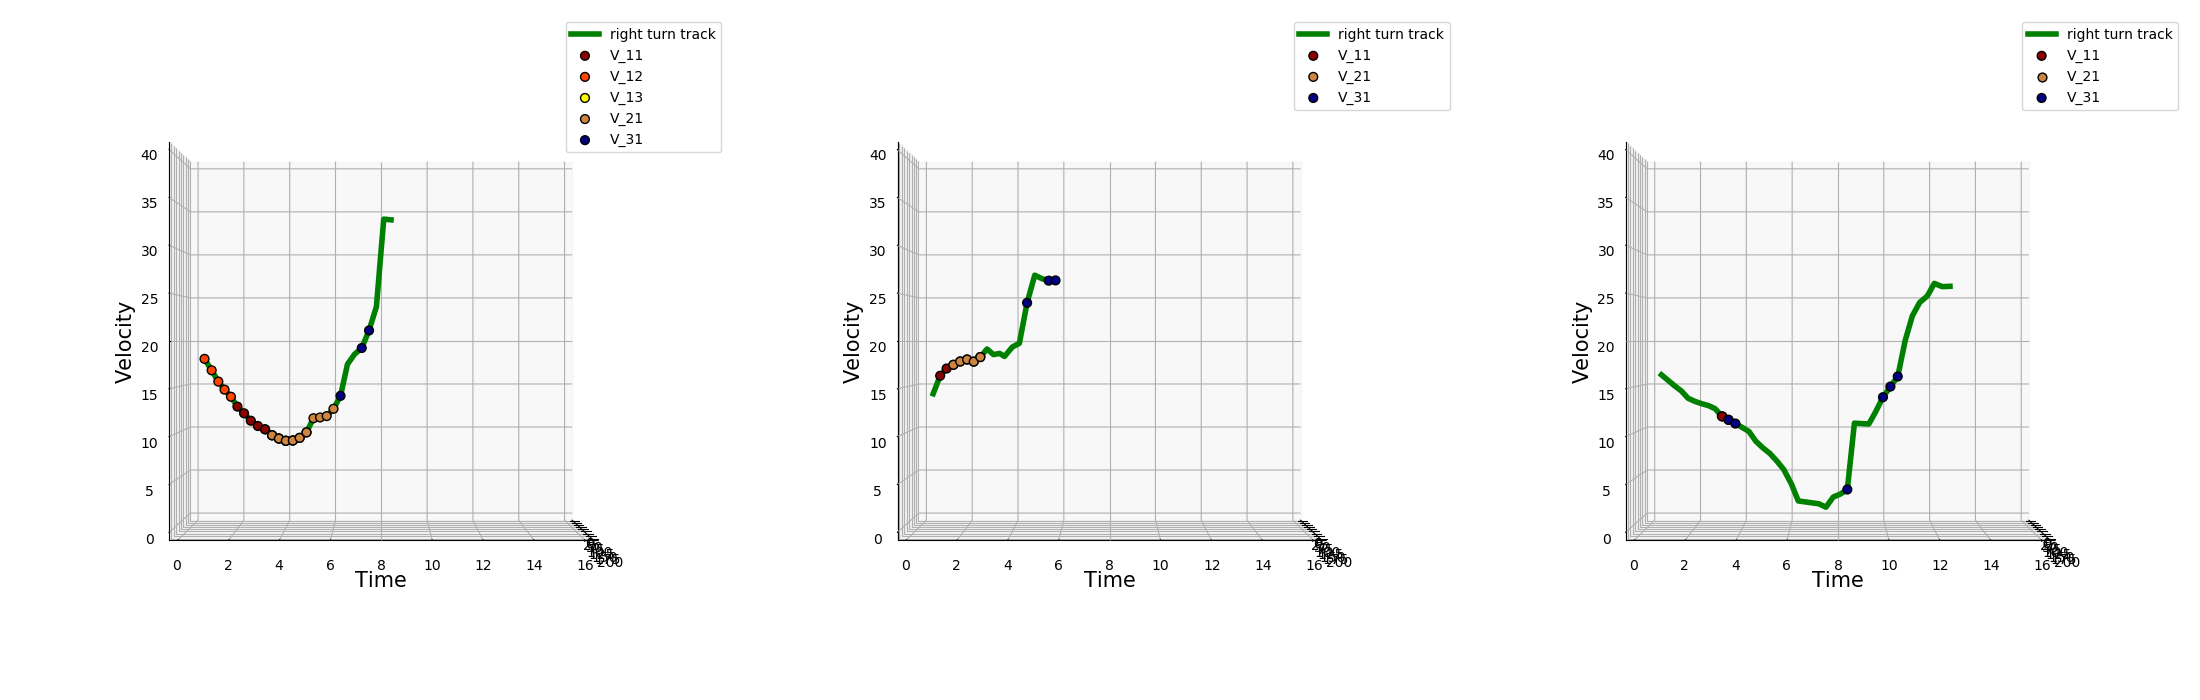

C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [333]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv
%matplotlib notebook

plot_number = 130
plot_step = 1   # specify here the n:th number of step that will be used in the plot ( this is to remove noice)
                    # if plot_step = 1 all data points will be used

# Loading file which contains state vector for right turn paths:
state_data = pd.read_csv(r'C:\Users\Katarina Tran\Desktop\CAS\Project_course_math_stat_modelling\2017_04_28_R\state_vector_R_filtered.csv',index_col=False, header=None,sep=',')
df_state = state_data
df_state.columns = df_state.iloc[0]
df_state = df_state.drop(df_state.index[0])   # drops the first row

df_state['cumulative theta'] = df_state['cumulative theta'].astype(float)
df_state['Velocity'] = df_state['Velocity'].astype(float)
df_state['time elapsed'] = df_state['time elapsed'].astype(float)

fig = plt.figure(figsize=(22,7))

# prepare scatter data for detecting pedestrians in occupancy plot:
df_scatter1 = df_state.loc[df_state['V_11'] == '1.0']
df_scatter1['color'] = 'darkred'
df_scatter1['label'] = 'V_11'
df_scatter2 = df_state.loc[df_state['V_12'] == '1.0']
df_scatter2['color'] = 'orangered'
df_scatter2['label'] = 'V_12'
df_scatter3 = df_state.loc[df_state['V_13'] == '1.0']
df_scatter3['color'] = 'yellow'
df_scatter3['label'] = 'V_13'

df_scatter4 = df_state.loc[df_state['V_21'] == '1.0']
df_scatter4['color'] = 'peru'
df_scatter4['label'] = 'V_21'

df_scatter5 = df_state.loc[df_state['V_31'] == '1.0']
df_scatter5['color'] = 'navy'
df_scatter5['label'] = 'V_31'

df_scatter = df_scatter1.append(df_scatter2)
df_scatter = df_scatter.append(df_scatter3)
df_scatter = df_scatter.append(df_scatter4)
df_scatter = df_scatter.append(df_scatter5)



grouped = df_state.groupby(['ID'])  
for ID,group in grouped:
    if ID == '10051749' or ID=='10053707' or ID == '10054648':
        group = group.reset_index()
        # set up the axes for the subplot
        plot_number = plot_number +1
        ax = fig.add_subplot(plot_number, projection='3d')
        ax.view_init(azim=360, elev=0)
        ax.set_xlim3d(0, 210)
        ax.set_ylim3d(0,16)
        ax.set_zlim3d(0,40)
        df_plot = group[['cumulative theta','time elapsed', 'Velocity']]
        df_plot = df_plot.iloc[::plot_step]
        theta = df_plot['cumulative theta'].to_numpy()
        time = df_plot['time elapsed'].to_numpy()
        velocity = df_plot['Velocity'].to_numpy()
        ax.plot3D(theta, time,velocity,'green',label ='right turn track',linewidth=4)
        # scatterplot:
        df_plot2 = df_scatter.loc[df_scatter['ID'] == ID]
        grouped_scatter = df_plot2.groupby(['label'])
        for label,group in grouped_scatter:
            theta = group['cumulative theta'].to_numpy()
            velocity = group['Velocity'].to_numpy()
            time = group['time elapsed'].to_numpy()
            #track_label = pd.Series('right turn track')
            plot_label = label
            ax.scatter3D(theta, time,velocity, s=40, c= group['color'],label=plot_label, edgecolors= 'black', alpha= 1)
        ax.legend()
            # label axes
    #ax.set_xlabel('Cumulative theta', fontsize=15)
    ax.set_ylabel('Time', fontsize=15)
    ax.set_zlabel('Velocity', fontsize=15)


plt.tight_layout()
plt.show()
plt.savefig('scatter_right.png')

**In back (note: Plotting state vector with larger time interval removes unwanted noices and makes it easier to detect scenarios) Producing scatter plot for visualizing other vehicles, for a single host vehicle in each plot 
ID = '10060815' , '10061600', '10065554' :**

<IPython.core.display.Javascript object>


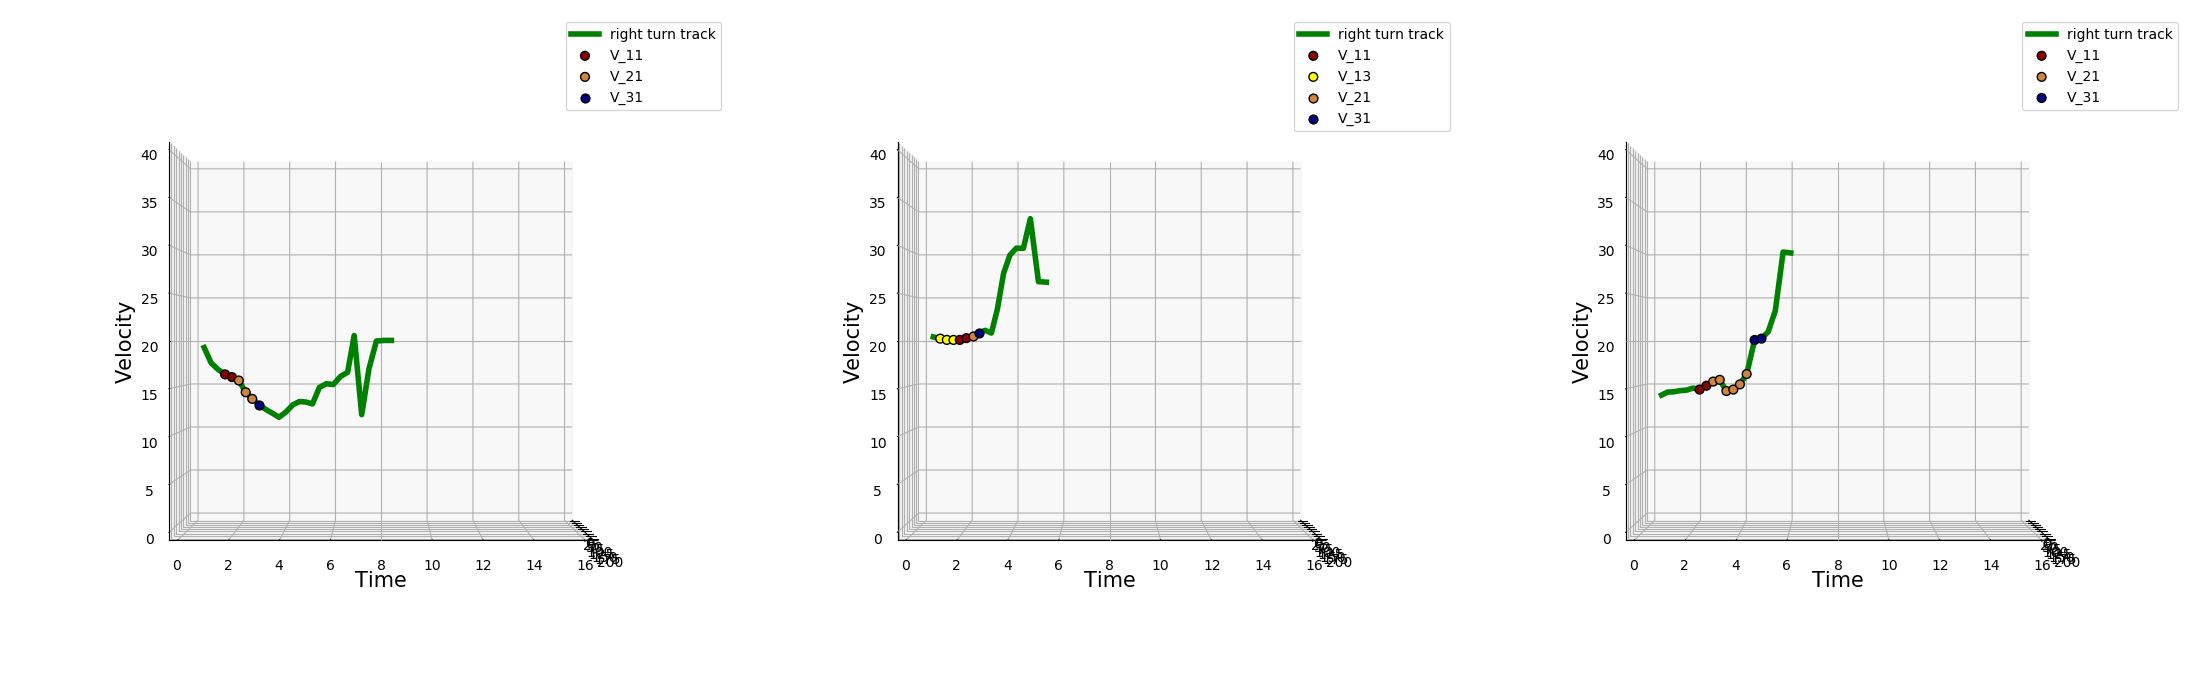

C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [338]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv
%matplotlib notebook

plot_number = 130
plot_step = 1   # specify here the n:th number of step that will be used in the plot ( this is to remove noice)
                    # if plot_step = 1 all data points will be used

# Loading file which contains state vector for right turn paths:
state_data = pd.read_csv(r'C:\Users\Katarina Tran\Desktop\CAS\Project_course_math_stat_modelling\2017_04_28_R\state_vector_R_filtered.csv',index_col=False, header=None,sep=',')
df_state = state_data
df_state.columns = df_state.iloc[0]
df_state = df_state.drop(df_state.index[0])   # drops the first row

df_state['cumulative theta'] = df_state['cumulative theta'].astype(float)
df_state['Velocity'] = df_state['Velocity'].astype(float)
df_state['time elapsed'] = df_state['time elapsed'].astype(float)

fig = plt.figure(figsize=(22,7))

# prepare scatter data for detecting pedestrians in occupancy plot:
df_scatter1 = df_state.loc[df_state['V_11'] == '1.0']
df_scatter1['color'] = 'darkred'
df_scatter1['label'] = 'V_11'
df_scatter2 = df_state.loc[df_state['V_12'] == '1.0']
df_scatter2['color'] = 'orangered'
df_scatter2['label'] = 'V_12'
df_scatter3 = df_state.loc[df_state['V_13'] == '1.0']
df_scatter3['color'] = 'yellow'
df_scatter3['label'] = 'V_13'

df_scatter4 = df_state.loc[df_state['V_21'] == '1.0']
df_scatter4['color'] = 'peru'
df_scatter4['label'] = 'V_21'

df_scatter5 = df_state.loc[df_state['V_31'] == '1.0']
df_scatter5['color'] = 'navy'
df_scatter5['label'] = 'V_31'

df_scatter = df_scatter1.append(df_scatter2)
df_scatter = df_scatter.append(df_scatter3)
df_scatter = df_scatter.append(df_scatter4)
df_scatter = df_scatter.append(df_scatter5)



grouped = df_state.groupby(['ID'])  
for ID,group in grouped:
    if ID == '10060815' or ID=='10061600' or ID == '10065554':
        group = group.reset_index()
        # set up the axes for the subplot
        plot_number = plot_number +1
        ax = fig.add_subplot(plot_number, projection='3d')
        ax.view_init(azim=360, elev=0)
        ax.set_xlim3d(0, 210)
        ax.set_ylim3d(0,16)
        ax.set_zlim3d(0,40)
        df_plot = group[['cumulative theta','time elapsed', 'Velocity']]
        df_plot = df_plot.iloc[::plot_step]
        theta = df_plot['cumulative theta'].to_numpy()
        time = df_plot['time elapsed'].to_numpy()
        velocity = df_plot['Velocity'].to_numpy()
        ax.plot3D(theta, time,velocity,'green',label ='right turn track',linewidth=4)
        # scatterplot:
        df_plot2 = df_scatter.loc[df_scatter['ID'] == ID]
        grouped_scatter = df_plot2.groupby(['label'])
        for label,group in grouped_scatter:
            theta = group['cumulative theta'].to_numpy()
            velocity = group['Velocity'].to_numpy()
            time = group['time elapsed'].to_numpy()
            #track_label = pd.Series('right turn track')
            plot_label = label
            ax.scatter3D(theta, time,velocity, s=40, c= group['color'],label=plot_label, edgecolors= 'black', alpha= 1)
        ax.legend()
            # label axes
    #ax.set_xlabel('Cumulative theta', fontsize=15)
    ax.set_ylabel('Time', fontsize=15)
    ax.set_zlabel('Velocity', fontsize=15)




plt.tight_layout()
plt.show()
plt.savefig('scatter_right.png')

**In back (note: Plotting state vector with larger time interval removes unwanted noices and makes it easier to detect scenarios) Producing scatter plot for visualizing other vehicles, for a single host vehicle in each plot 
ID = '10066420' , '10067595', '10071692' :**

<IPython.core.display.Javascript object>


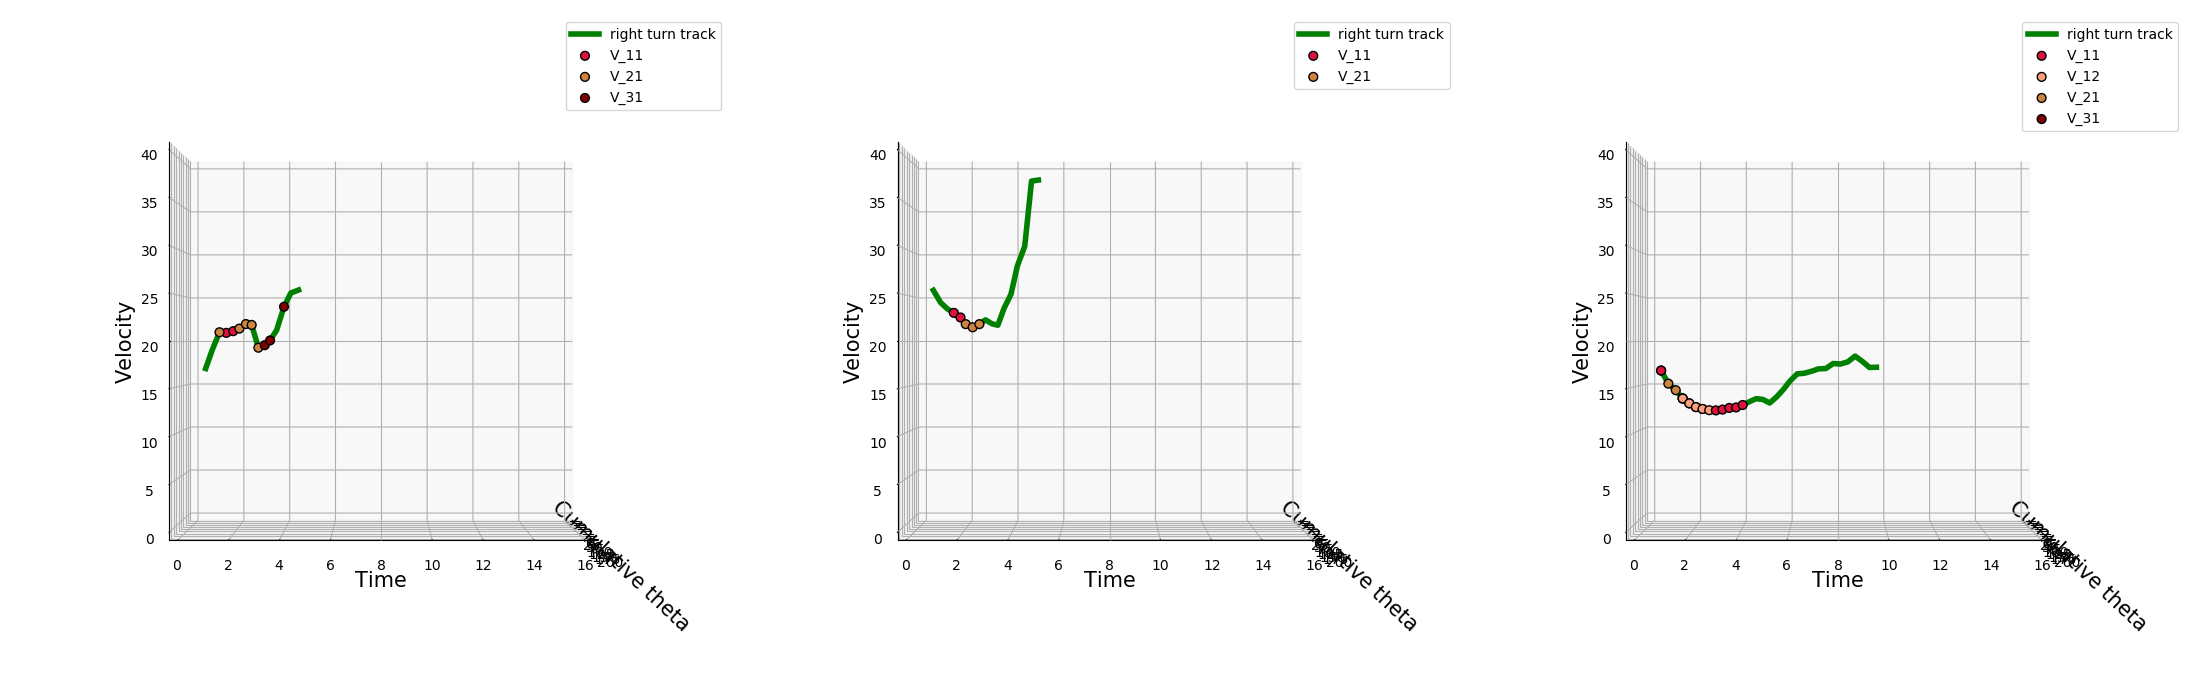

C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [171]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv
%matplotlib notebook

plot_number = 130
plot_step = 1   # specify here the n:th number of step that will be used in the plot ( this is to remove noice)
                    # if plot_step = 1 all data points will be used

# Loading file which contains state vector for right turn paths:
state_data = pd.read_csv(r'C:\Users\Katarina Tran\Desktop\CAS\Project_course_math_stat_modelling\2017_04_28_R\state_vector_R_filtered.csv',index_col=False, header=None,sep=',')
df_state = state_data
df_state.columns = df_state.iloc[0]
df_state = df_state.drop(df_state.index[0])   # drops the first row

df_state['cumulative theta'] = df_state['cumulative theta'].astype(float)
df_state['Velocity'] = df_state['Velocity'].astype(float)
df_state['time elapsed'] = df_state['time elapsed'].astype(float)

fig = plt.figure(figsize=(22,7))

# prepare scatter data for detecting pedestrians in occupancy plot:
df_scatter1 = df_state.loc[df_state['V_11'] == '1.0']
df_scatter1['color'] = 'crimson'
df_scatter1['label'] = 'V_11'
df_scatter2 = df_state.loc[df_state['V_12'] == '1.0']
df_scatter2['color'] = 'lightsalmon'
df_scatter2['label'] = 'V_12'
df_scatter3 = df_state.loc[df_state['V_13'] == '1.0']
df_scatter3['color'] = 'yellow'
df_scatter3['label'] = 'V_13'

df_scatter4 = df_state.loc[df_state['V_21'] == '1.0']
df_scatter4['color'] = 'peru'
df_scatter4['label'] = 'V_21'

df_scatter5 = df_state.loc[df_state['V_31'] == '1.0']
df_scatter5['color'] = 'maroon'
df_scatter5['label'] = 'V_31'

df_scatter = df_scatter1.append(df_scatter2)
df_scatter = df_scatter.append(df_scatter3)
df_scatter = df_scatter.append(df_scatter4)
df_scatter = df_scatter.append(df_scatter5)



grouped = df_state.groupby(['ID'])  
for ID,group in grouped:
    if ID == '10066420' or ID=='10067595' or ID == '10071692':
        group = group.reset_index()
        # set up the axes for the subplot
        plot_number = plot_number +1
        ax = fig.add_subplot(plot_number, projection='3d')
        ax.view_init(azim=360, elev=0)
        ax.set_xlim3d(0, 210)
        ax.set_ylim3d(0,16)
        ax.set_zlim3d(0,40)
        df_plot = group[['cumulative theta','time elapsed', 'Velocity']]
        df_plot = df_plot.iloc[::plot_step]
        theta = df_plot['cumulative theta'].to_numpy()
        time = df_plot['time elapsed'].to_numpy()
        velocity = df_plot['Velocity'].to_numpy()
        ax.plot3D(theta, time,velocity,'green',label ='right turn track',linewidth=4)
        # scatterplot:
        df_plot2 = df_scatter.loc[df_scatter['ID'] == ID]
        grouped_scatter = df_plot2.groupby(['label'])
        for label,group in grouped_scatter:
            theta = group['cumulative theta'].to_numpy()
            velocity = group['Velocity'].to_numpy()
            time = group['time elapsed'].to_numpy()
            #track_label = pd.Series('right turn track')
            plot_label = label
            ax.scatter3D(theta, time,velocity, s=40, c= group['color'],label=plot_label, edgecolors= 'black', alpha= 1)
        ax.legend()
            # label axes
    ax.set_xlabel('Cumulative theta', fontsize=15)
    ax.set_ylabel('Time', fontsize=15)
    ax.set_zlabel('Velocity', fontsize=15)

plt.tight_layout()
plt.show()
plt.savefig('scatter_right.png')

**In back (note: Plotting state vector with larger time interval removes unwanted noices and makes it easier to detect scenarios) Producing scatter plot for visualizing other vehicles, for a single host vehicle in each plot 
ID = '10078424' , '10088357' :**

<IPython.core.display.Javascript object>


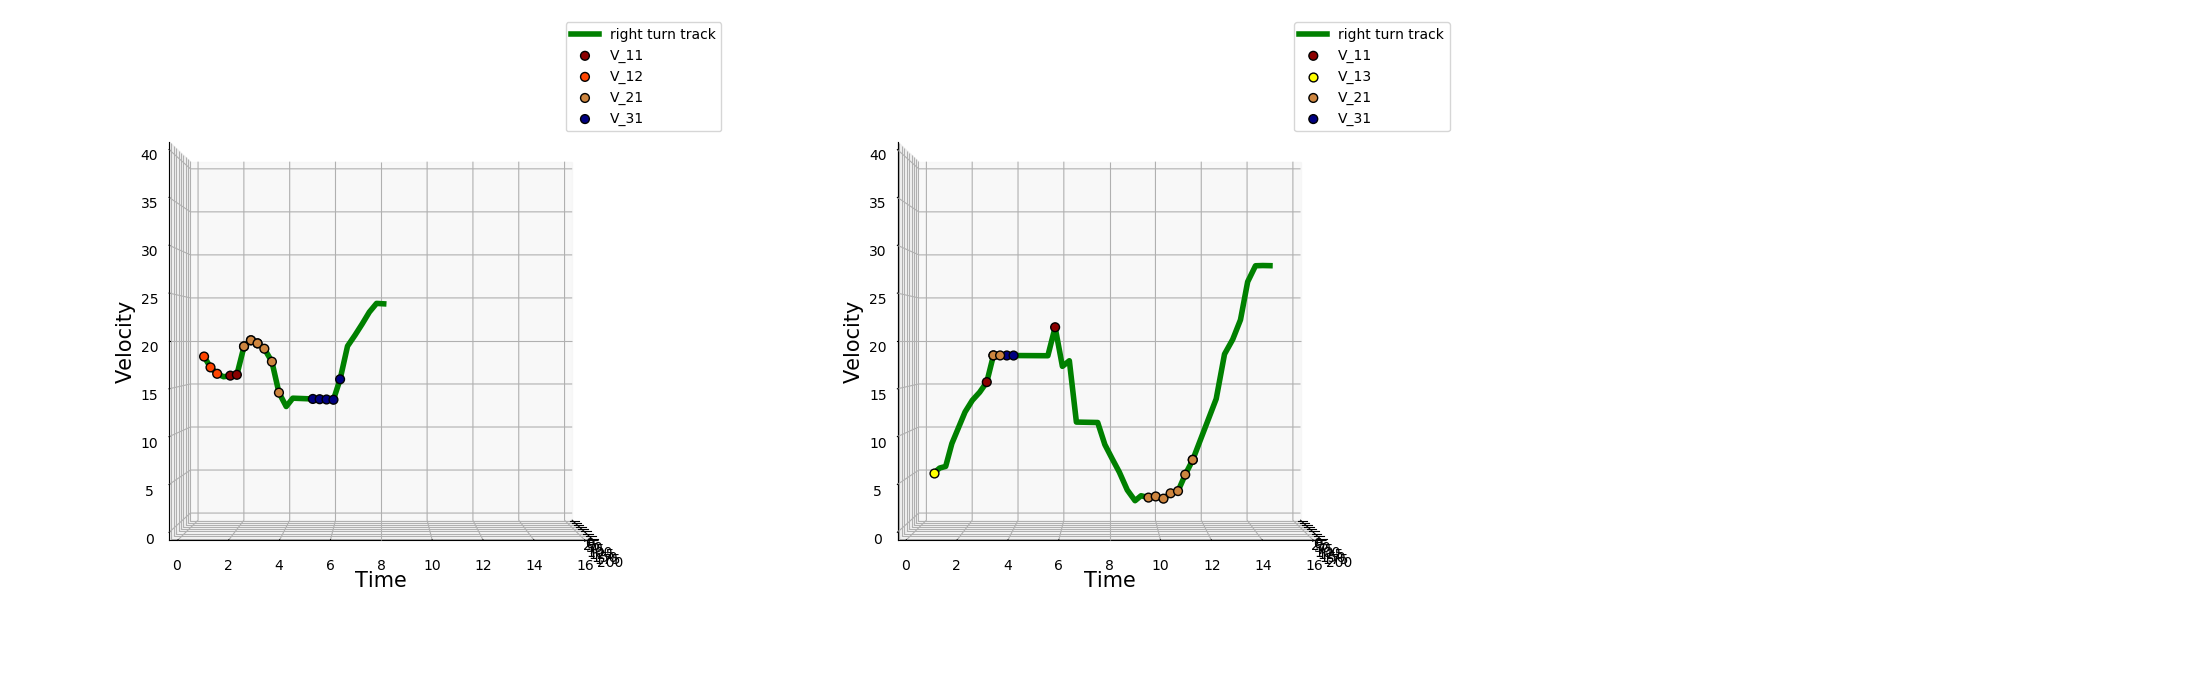

C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [336]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv
%matplotlib notebook

plot_number = 130
plot_step = 1   # specify here the n:th number of step that will be used in the plot ( this is to remove noice)
                    # if plot_step = 1 all data points will be used

# Loading file which contains state vector for right turn paths:
state_data = pd.read_csv(r'C:\Users\Katarina Tran\Desktop\CAS\Project_course_math_stat_modelling\2017_04_28_R\state_vector_R_filtered.csv',index_col=False, header=None,sep=',')
df_state = state_data
df_state.columns = df_state.iloc[0]
df_state = df_state.drop(df_state.index[0])   # drops the first row

df_state['cumulative theta'] = df_state['cumulative theta'].astype(float)
df_state['Velocity'] = df_state['Velocity'].astype(float)
df_state['time elapsed'] = df_state['time elapsed'].astype(float)

fig = plt.figure(figsize=(22,7))

# prepare scatter data for detecting pedestrians in occupancy plot:
df_scatter1 = df_state.loc[df_state['V_11'] == '1.0']
df_scatter1['color'] = 'darkred'
df_scatter1['label'] = 'V_11'
df_scatter2 = df_state.loc[df_state['V_12'] == '1.0']
df_scatter2['color'] = 'orangered'
df_scatter2['label'] = 'V_12'
df_scatter3 = df_state.loc[df_state['V_13'] == '1.0']
df_scatter3['color'] = 'yellow'
df_scatter3['label'] = 'V_13'

df_scatter4 = df_state.loc[df_state['V_21'] == '1.0']
df_scatter4['color'] = 'peru'
df_scatter4['label'] = 'V_21'

df_scatter5 = df_state.loc[df_state['V_31'] == '1.0']
df_scatter5['color'] = 'navy'
df_scatter5['label'] = 'V_31'

df_scatter = df_scatter1.append(df_scatter2)
df_scatter = df_scatter.append(df_scatter3)
df_scatter = df_scatter.append(df_scatter4)
df_scatter = df_scatter.append(df_scatter5)



grouped = df_state.groupby(['ID'])  
for ID,group in grouped:
    if ID == '10078424' or ID=='10088357' :
        group = group.reset_index()
        # set up the axes for the subplot
        plot_number = plot_number +1
        ax = fig.add_subplot(plot_number, projection='3d')
        ax.view_init(azim=360, elev=0)
        ax.set_xlim3d(0, 210)
        ax.set_ylim3d(0,16)
        ax.set_zlim3d(0,40)
        df_plot = group[['cumulative theta','time elapsed', 'Velocity']]
        df_plot = df_plot.iloc[::plot_step]
        theta = df_plot['cumulative theta'].to_numpy()
        time = df_plot['time elapsed'].to_numpy()
        velocity = df_plot['Velocity'].to_numpy()
        ax.plot3D(theta, time,velocity,'green',label ='right turn track',linewidth=4)
        # scatterplot:
        df_plot2 = df_scatter.loc[df_scatter['ID'] == ID]
        grouped_scatter = df_plot2.groupby(['label'])
        for label,group in grouped_scatter:
            theta = group['cumulative theta'].to_numpy()
            velocity = group['Velocity'].to_numpy()
            time = group['time elapsed'].to_numpy()
            #track_label = pd.Series('right turn track')
            plot_label = label
            ax.scatter3D(theta, time,velocity, s=40, c= group['color'],label=plot_label, edgecolors= 'black', alpha= 1)
        ax.legend()
            # label axes
    #ax.set_xlabel('Cumulative theta', fontsize=15)
    ax.set_ylabel('Time', fontsize=15)
    ax.set_zlabel('Velocity', fontsize=15)

plt.tight_layout()
plt.show()
plt.savefig('scatter_right.png')

**Checking occupation matrix if contains specific scenarios (stopping for pedestrians to pass) :**

In [119]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv

# Loading file which contains state vector for right turn paths:
state_data = pd.read_csv(r'C:\Users\Katarina Tran\Desktop\CAS\Project_course_math_stat_modelling\2017_04_28_R\state_vector_R_filtered.csv',index_col=False, header=None,sep=',')
df_state = state_data
df_state.columns = df_state.iloc[0]
df_state = df_state.drop(df_state.index[0])   # drops the first row
df_state['index'] = df_state.index
#print(df_state.head())
#print(df_state.dtypes)
# creating empty data frame for state vector:
df_ped_LR = pd.DataFrame(columns=['ID'])
df_ped_RL = pd.DataFrame(columns=['ID'])
index_list = []

grouped = df_state.groupby(['ID'])  
for ID,group in grouped:
    if ((group['P_11'] == '1.0').any() and (group['P_12'] == '1.0').any() and (group['P_13'] == '1.0').any()):
        #index_L = group['index'].loc[group['P_11'].iloc[0]].values
        #index_R = group['index'].loc[group['P_13'].iloc[0]].values
        #if index_L >= index_R:
        #    df_ped_LR = df_ped_LR.append(group)
        #else:
        #    df_ped_RL = df_ped_RL.append(group)
        print(ID)




10057635
10074553
10086678
10088357


**RIGHT TURN (Plotting state vector with larger time interval removes unwanted noices and makes it easier to detect scenarios) Producing scatter plot for visualizing pedestrians, for a single vehicle ID in each plot:**

<IPython.core.display.Javascript object>


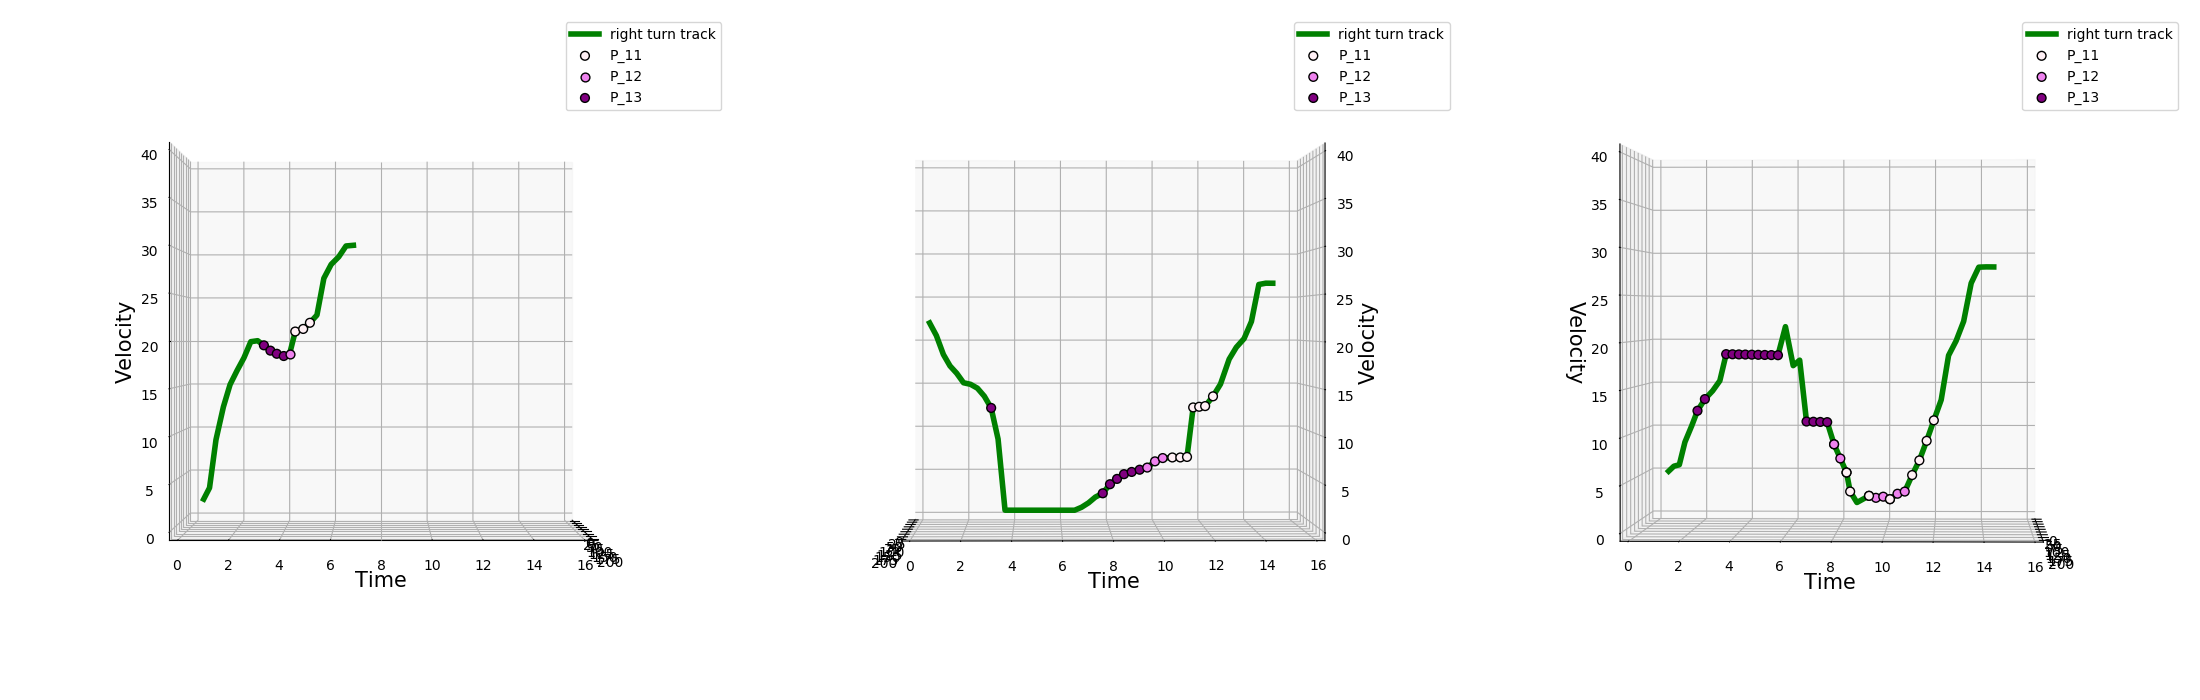

C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [314]:

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv
%matplotlib notebook

plot_number = 130
plot_step = 1   # specify here the n:th number of step that will be used in the plot ( this is to remove noice)
                    # if plot_step = 1 all data points will be used

# Loading file which contains state vector for right turn paths:
state_data = pd.read_csv(r'C:\Users\Katarina Tran\Desktop\CAS\Project_course_math_stat_modelling\2017_04_28_R\state_vector_R_filtered.csv',index_col=False, header=None,sep=',')
df_state = state_data
df_state.columns = df_state.iloc[0]
df_state = df_state.drop(df_state.index[0])   # drops the first row

df_state['cumulative theta'] = df_state['cumulative theta'].astype(float)
df_state['Velocity'] = df_state['Velocity'].astype(float)
df_state['time elapsed'] = df_state['time elapsed'].astype(float)

fig = plt.figure(figsize=(22,7))

# prepare scatter data for detecting pedestrians in occupancy plot:
df_scatter1 = df_state.loc[df_state['P_11'] == '1.0']
df_scatter1['color'] = 'lavenderblush'
df_scatter1['label'] = 'P_11'
df_scatter2 = df_state.loc[df_state['P_12'] == '1.0']
df_scatter2['color'] = 'violet'
df_scatter2['label'] = 'P_12'
df_scatter3 = df_state.loc[df_state['P_13'] == '1.0']
df_scatter3['color'] = 'purple'
df_scatter3['label'] = 'P_13'
df_scatter = df_scatter1.append(df_scatter2)
df_scatter = df_scatter.append(df_scatter3)



grouped = df_state.groupby(['ID'])  
for ID,group in grouped:
    if ID == '10074553' or ID=='10057635' or ID == '10088357':
        group = group.reset_index()
        # set up the axes for the subplot
        plot_number = plot_number +1
        ax = fig.add_subplot(plot_number, projection='3d')
        ax.view_init(azim=360, elev=0)
        ax.set_xlim3d(0, 210)
        ax.set_ylim3d(0,16)
        ax.set_zlim3d(0,40)
        df_plot = group[['cumulative theta','time elapsed', 'Velocity']]
        df_plot = df_plot.iloc[::plot_step]
        theta = df_plot['cumulative theta'].to_numpy()
        time = df_plot['time elapsed'].to_numpy()
        velocity = df_plot['Velocity'].to_numpy()
        ax.plot3D(theta, time,velocity,'green',label ='right turn track',linewidth=4)
        # scatterplot:
        df_plot2 = df_scatter.loc[df_scatter['ID'] == ID]
        grouped_scatter = df_plot2.groupby(['label'])
        for label,group in grouped_scatter:
            theta = group['cumulative theta'].to_numpy()
            velocity = group['Velocity'].to_numpy()
            time = group['time elapsed'].to_numpy()
            #track_label = pd.Series('right turn track')
            plot_label = label
            ax.scatter3D(theta, time,velocity, s=40, c= group['color'],label=plot_label, edgecolors= 'black', alpha= 1)
        ax.legend()
            # label axes
    #ax.set_xlabel('Cumulative theta', fontsize=15)
    ax.set_ylabel('Time', fontsize=15)
    ax.set_zlabel('Velocity', fontsize=15)


#print(df_state[['ID','P_11','P_12','P_13']].loc[df_state['ID']=='10086678'])
'''
# creating scatter plot for visualization of pedestrians:
# checking number of detected pedestrians in the occupancy grid
#print(df_state['P_13'].value_counts())  
print(df_state['ID'].loc[df_state['P_13'] == '1.0'])
print(df_state['ID'].loc[df_state['P_12'] == '1.0'])
print(df_state['ID'].loc[df_state['P_11'] == '1.0'])  # non were found in 'P_11'

# Scatter plot separately for 'P-11', 'P_12' and 'P_13':
df_11 = df_state.loc[df_state['P_11'] == '1.0']
theta = df_11['cumulative theta'].to_numpy()
velocity = df_11['Velocity'].to_numpy()
time = df_11['time elapsed'].to_numpy()
ax.scatter3D(theta, time,velocity, s=120, c= 'lavenderblush', edgecolors= 'black', alpha= 1, label='P_11')
ax.legend()

df_12 = df_state.loc[df_state['P_12'] == '1.0']
theta = df_12['cumulative theta'].to_numpy()
velocity = df_12['Velocity'].to_numpy()
time = df_12['time elapsed'].to_numpy()
ax.scatter3D(theta, time,velocity, s=120, c= 'violet', edgecolors= 'black', alpha= 1, label='P_12')
ax.legend()

df_13 = df_state.loc[df_state['P_13'] == '1.0']
theta = df_13['cumulative theta'].to_numpy()
velocity = df_13['Velocity'].to_numpy()
time = df_13['time elapsed'].to_numpy()
ax.scatter3D(theta, time,velocity, s=120, c= 'purple', edgecolors= 'black', alpha= 1, label='P_13')
ax.legend()
'''
plt.tight_layout()
plt.show()
plt.savefig('scatter_right.png')

**Test cell for plotting :**

<IPython.core.display.Javascript object>


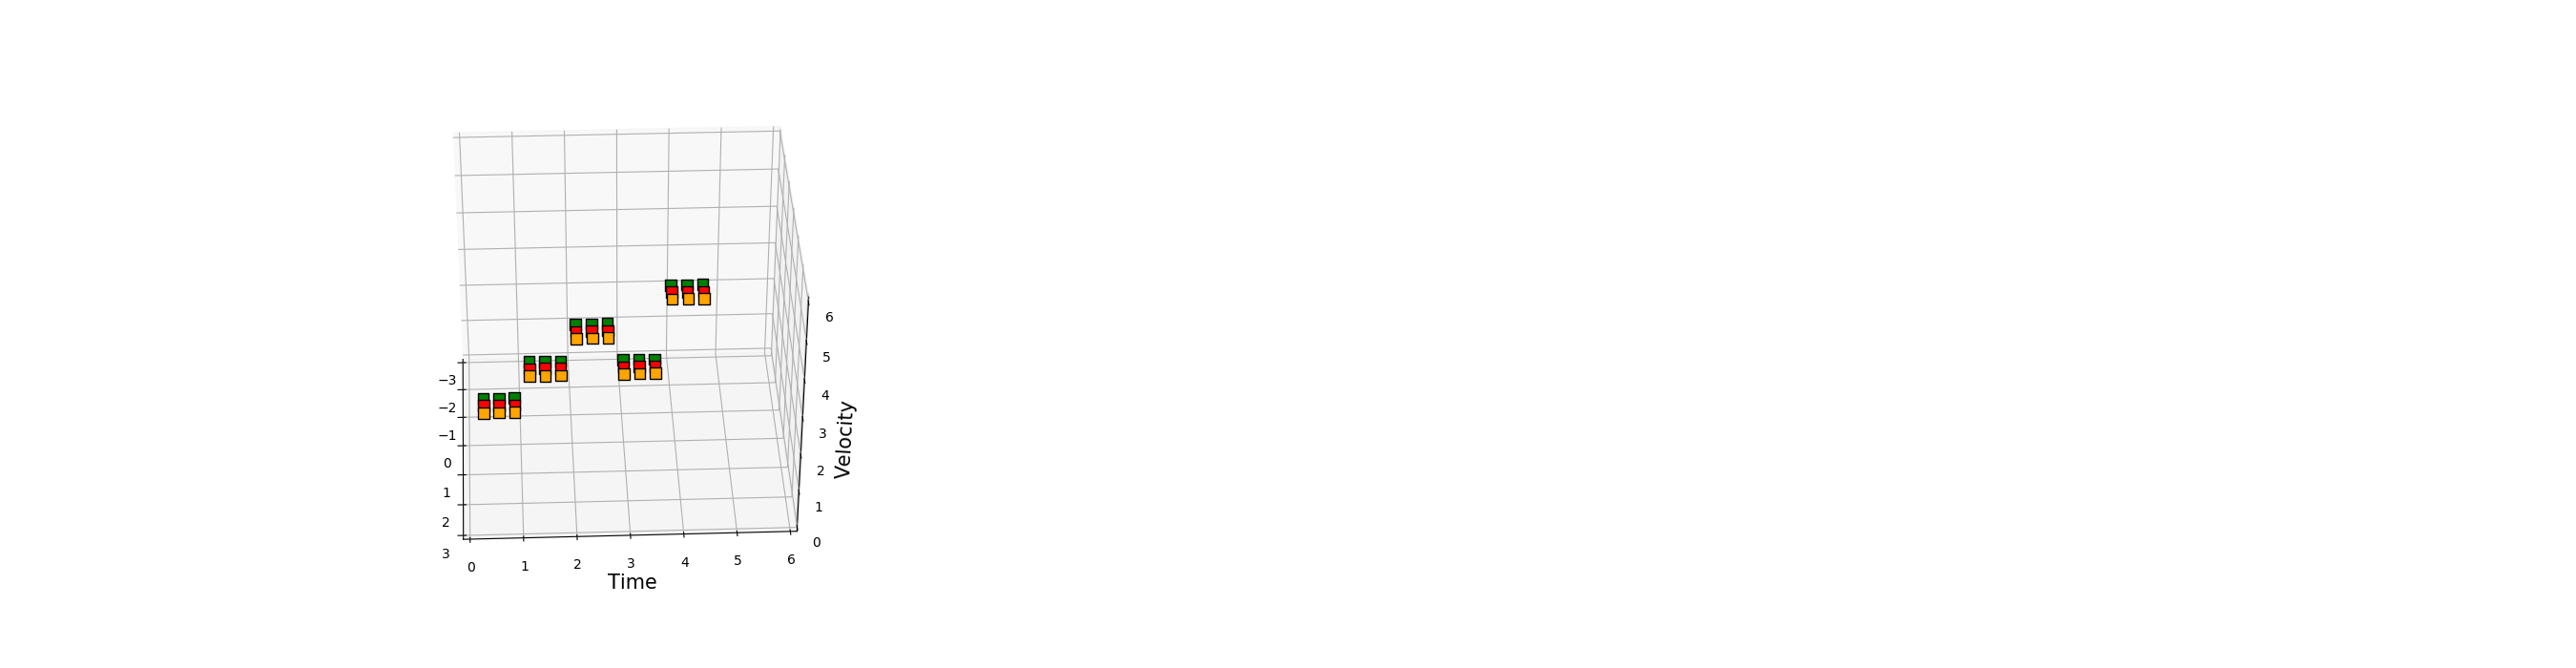

15


In [351]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig = plt.figure(figsize=(27,7))
ax = fig.add_subplot(131, projection='3d')
ax.set_xlim3d(-3, 3)
ax.set_ylim3d(0,6)
ax.set_zlim3d(0,6)

time = [0.3,0.6,0.9, 1.2,1.5,1.8, 2.1,2.4, 2.7,  3, 3.3, 3.6,  3.9, 4.2, 4.5]
velocity = [1,1,1, 2,2,2, 3,3,3, 4,4,4, 5,5,5, ]
print(len(time))
theta1 = np.ones(len(time))*0.25
theta0 = [np.ones(len(time))*0]
theta_m = np.ones(len(time))*(-0.25)

ax.scatter3D(theta_m,time,velocity, s=70, c= 'green',marker='s', edgecolors= 'black', alpha= 1)
ax.scatter3D(theta0,time,velocity, s=70, c= 'red',marker='s', edgecolors= 'black', alpha= 1)
ax.scatter3D(theta1,time,velocity, s=70, c= 'orange',marker='s', edgecolors= 'black', alpha= 1)

#ax.set_xlabel('Cumulative theta', fontsize=15)
ax.set_ylabel('Time', fontsize=15)
ax.set_zlabel('Speed', fontsize=15)

plt.show()

<IPython.core.display.Javascript object>


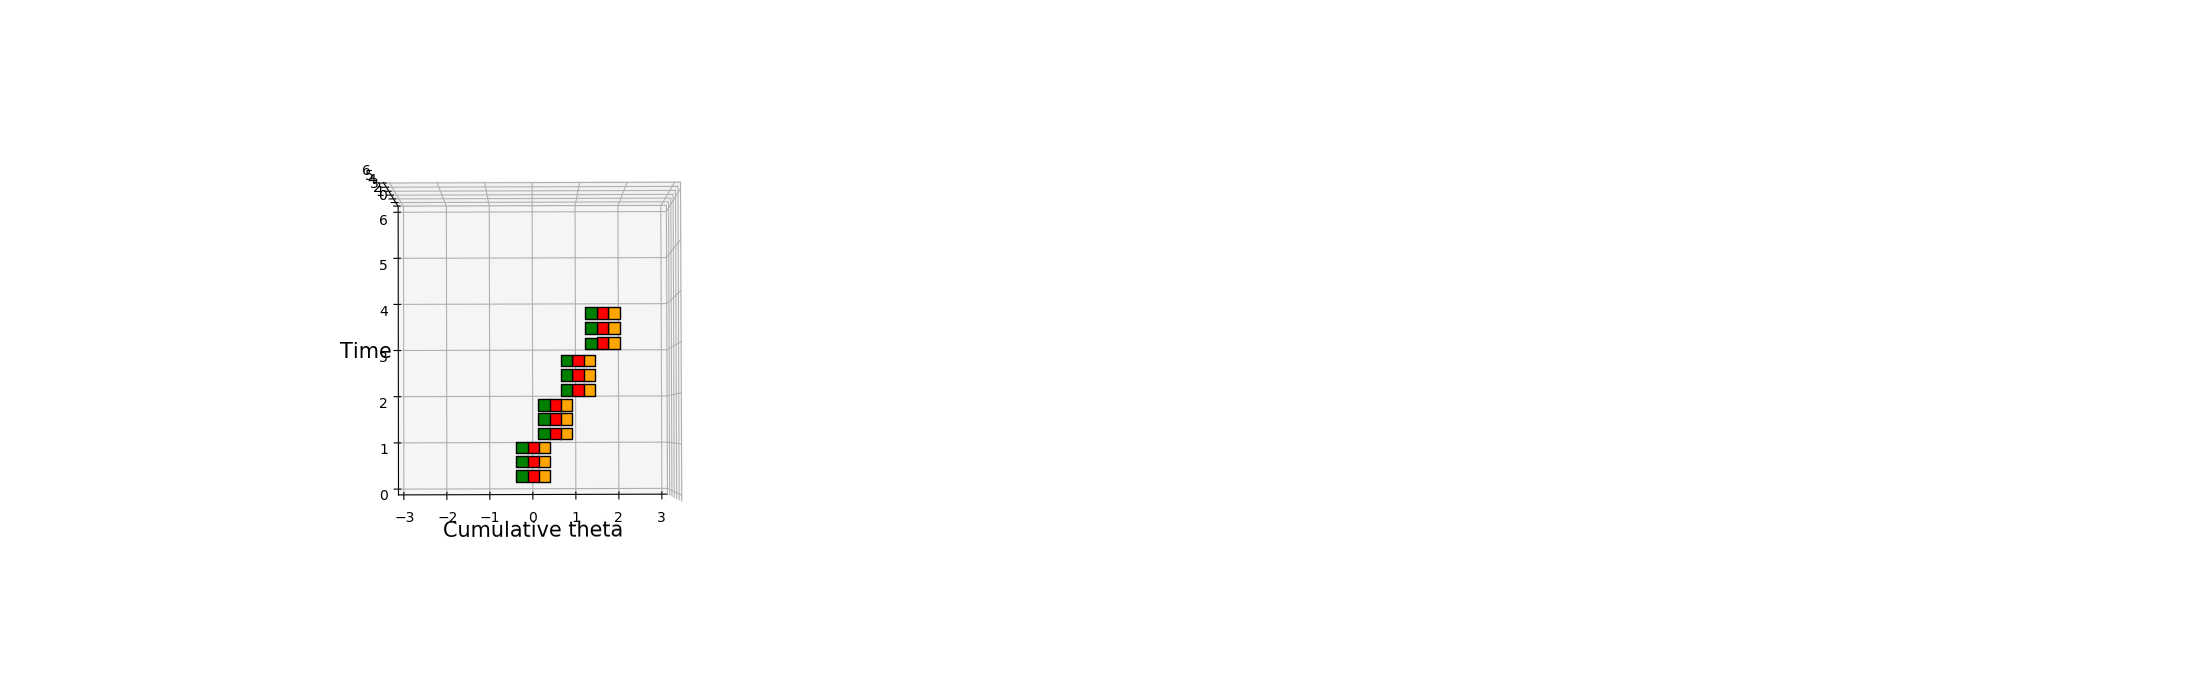

12


In [355]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig = plt.figure(figsize=(22,7))
ax = fig.add_subplot(131, projection='3d')
ax.set_xlim3d(-3, 3)
ax.set_ylim3d(0,6)
ax.set_zlim3d(0,6)


time = [0.3,0.6,0.9,1.2,1.5,1.8,2.1,2.4, 2.7, 3, 3.3,3.6]
velocity = [1,1,1,2,2,2,3,3,3,5,5,5]
print(len(time))
theta0 = np.array([0,0,0,0.5,0.5,0.5,1,1,1,1.5,1.5,1.5])
theta1 = theta0 +0.25
theta_m = theta0 -0.25

ax.scatter3D(theta_m,time,velocity, s=70, c= 'green',marker='s', edgecolors= 'black', alpha= 1)
ax.scatter3D(theta0,time,velocity, s=70, c= 'red',marker='s', edgecolors= 'black', alpha= 1)
ax.scatter3D(theta1,time,velocity, s=70, c= 'orange',marker='s', edgecolors= 'black', alpha= 1)

ax.set_xlabel('Cumulative theta', fontsize=15)
ax.set_ylabel('Time', fontsize=15)
#ax.set_zlabel('Velocity', fontsize=15)

plt.show()

**(File : 2017_04_28) Cluster scenarios for turning RIGHT and stop for pedestrians :**

<IPython.core.display.Javascript object>


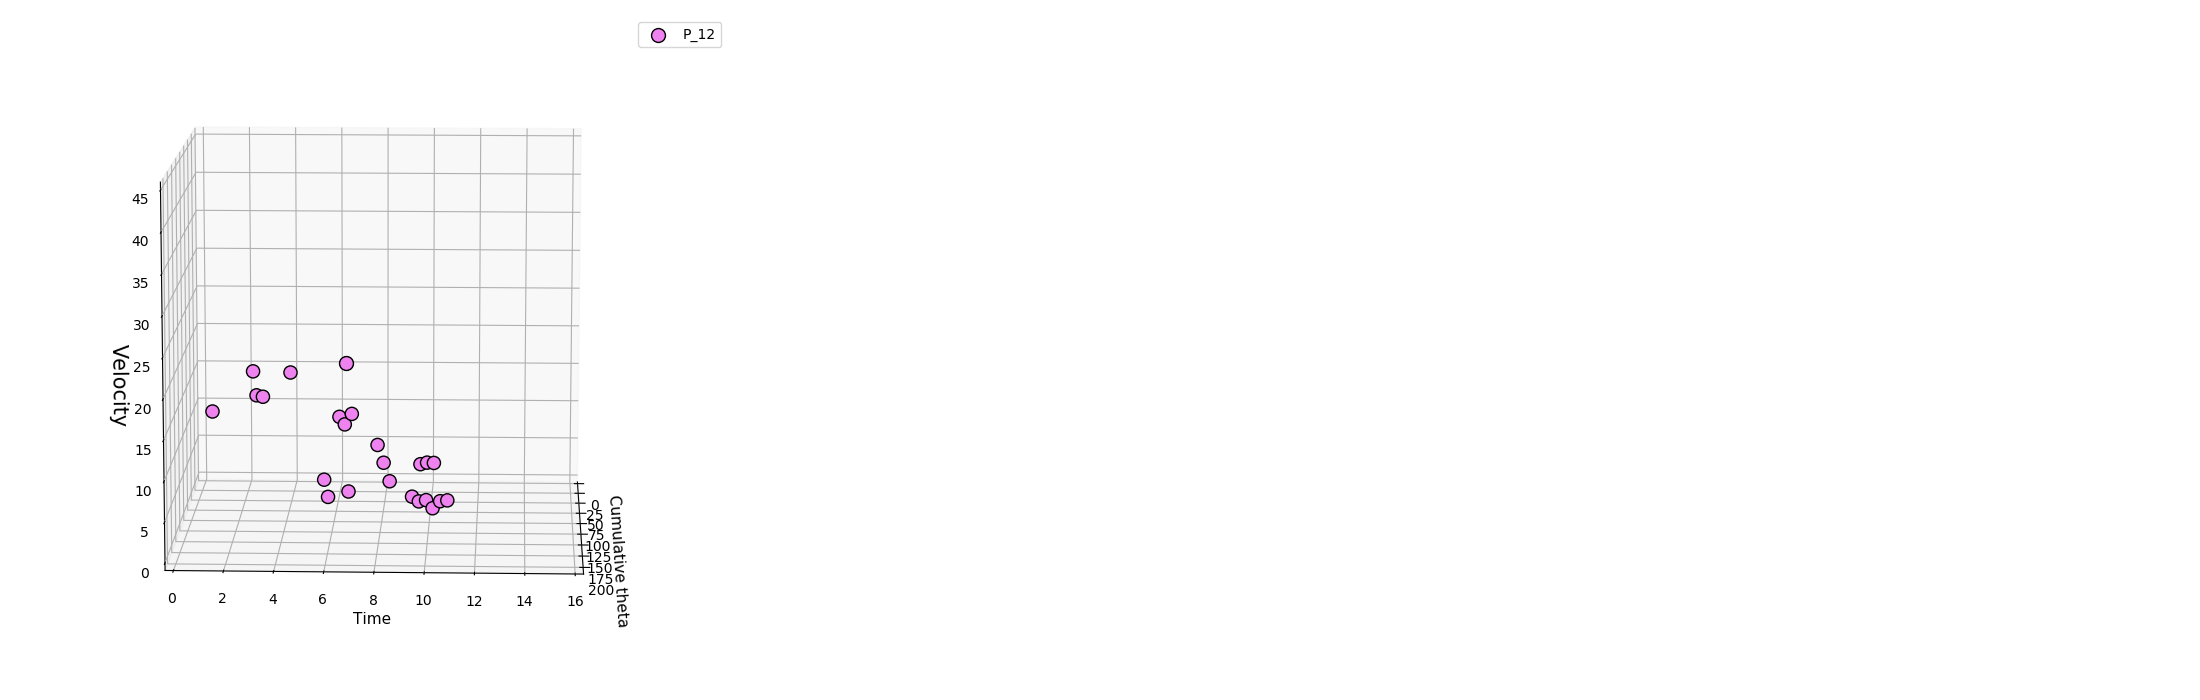

C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [325]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv
%matplotlib notebook

plot_number = 130
plot_step = 2   # specify here the n:th number of step that will be used in the plot ( this is to remove noice)
                    # if plot_step = 1 all data points will be used

# Loading file which contains state vector for right turn paths:
state_data = pd.read_csv(r'C:\Users\Katarina Tran\Desktop\CAS\Project_course_math_stat_modelling\2017_04_28_R\state_vector_R_filtered.csv',index_col=False, header=None,sep=',')
df_state = state_data
df_state.columns = df_state.iloc[0]
df_state = df_state.drop(df_state.index[0])   # drops the first row

df_state['cumulative theta'] = df_state['cumulative theta'].astype(float)
df_state['Velocity'] = df_state['Velocity'].astype(float)
df_state['time elapsed'] = df_state['time elapsed'].astype(float)

fig = plt.figure(figsize=(22,7))

# prepare scatter data for detecting pedestrians in occupancy plot:
'''
df_scatter1 = df_state.loc[df_state['P_11'] == '1.0']
df_scatter1['color'] = 'lavenderblush'
df_scatter1['label'] = 'P_11'
df_scatter2 = df_state.loc[df_state['P_12'] == '1.0']
df_scatter2['color'] = 'violet'
df_scatter2['label'] = 'P_12'
df_scatter3 = df_state.loc[df_state['P_13'] == '1.0']
df_scatter3['color'] = 'purple'
df_scatter3['label'] = 'P_13'
df_scatter = df_scatter1.append(df_scatter2)
df_scatter = df_scatter.append(df_scatter3)
'''
#df_scatter1 = df_state.loc[df_state['P_11'] == '1.0']
#df_scatter1['color'] = 'lavenderblush'
#df_scatter1['label'] = 'P_11'
df_scatter2 = df_state.loc[df_state['P_12'] == '1.0']
df_scatter2['color'] = 'violet'
df_scatter2['label'] = 'P_12'
#df_scatter3 = df_state.loc[df_state['P_13'] == '1.0']
#df_scatter3['color'] = 'purple'
#df_scatter3['label'] = 'P_13'
df_scatter = df_scatter2

plot_ID = df_scatter['ID'].unique()
plot_number = 131   # put plot in first subplot
ax = fig.add_subplot(plot_number, projection='3d')
ax.view_init(azim=360, elev=0)
ax.set_xlim3d(0, 210)
ax.set_ylim3d(0,16)
ax.set_zlim3d(0,45)

grouped = df_state.groupby(['ID'])  
for ID,group in grouped:
    if group['ID'].isin(plot_ID).any() and group['P_12'].any():  # checks whether any of the 'P_12' cells are occupied, meaning if any pedestrian crossed in front
            # set up the axes for the subplot
        
        #else :
        #    plot_number = 132  # else put it in second subplot
        df_plot = group[['cumulative theta','time elapsed', 'Velocity']]
        df_plot = df_plot.iloc[::plot_step]
        theta = df_plot['cumulative theta'].to_numpy()
        time = df_plot['time elapsed'].to_numpy()
        velocity = df_plot['Velocity'].to_numpy()
        #ax.plot3D(theta, time,velocity,'green',linewidth=1)
        # scatterplot:
        df_plot2 = df_scatter.loc[df_scatter['ID'] == ID]
        theta_scat = df_plot2['cumulative theta'].to_numpy()
        velocity_scat = df_plot2['Velocity'].to_numpy()
        time_scat = df_plot2['time elapsed'].to_numpy()
        track_label = pd.Series('right turn track')
        ax.scatter3D(theta_scat, time_scat,velocity_scat, s=90, c= 'violet', edgecolors= 'black', alpha= 1)
       


    
    
#ax.plot3D(theta, time,velocity,'green',label ='right turn track',linewidth=1)
ax.scatter3D(theta_scat, time_scat,velocity_scat, s=100,label='P_12', c= 'violet', edgecolors= 'black', alpha= 1)
ax.set_xlabel('Cumulative theta', fontsize=11)
ax.set_ylabel('Time', fontsize=11)
ax.set_zlabel('Velocity', fontsize=15)
ax.legend()


'''
# creating scatter plot for visualization of pedestrians:
# checking number of detected pedestrians in the occupancy grid
#print(df_state['P_13'].value_counts())  
print(df_state['ID'].loc[df_state['P_13'] == '1.0'])
print(df_state['ID'].loc[df_state['P_12'] == '1.0'])
print(df_state['ID'].loc[df_state['P_11'] == '1.0'])  # non were found in 'P_11'

# Scatter plot separately for 'P-11', 'P_12' and 'P_13':
df_11 = df_state.loc[df_state['P_11'] == '1.0']
theta = df_11['cumulative theta'].to_numpy()
velocity = df_11['Velocity'].to_numpy()
time = df_11['time elapsed'].to_numpy()
ax.scatter3D(theta, time,velocity, s=120, c= 'lavenderblush', edgecolors= 'black', alpha= 1, label='P_11')
ax.legend()

df_12 = df_state.loc[df_state['P_12'] == '1.0']
theta = df_12['cumulative theta'].to_numpy()
velocity = df_12['Velocity'].to_numpy()
time = df_12['time elapsed'].to_numpy()
ax.scatter3D(theta, time,velocity, s=120, c= 'violet', edgecolors= 'black', alpha= 1, label='P_12')
ax.legend()

df_13 = df_state.loc[df_state['P_13'] == '1.0']
theta = df_13['cumulative theta'].to_numpy()
velocity = df_13['Velocity'].to_numpy()
time = df_13['time elapsed'].to_numpy()
ax.scatter3D(theta, time,velocity, s=120, c= 'purple', edgecolors= 'black', alpha= 1, label='P_13')
ax.legend()
'''
plt.tight_layout()
plt.show()
#plt.savefig('scatter_right.png')

**(File : result_2017_05_17_V_right.csv ) Cluster scenarios for turning RIGHT and stop for pedestrians :**

**Visualization of track consisting of many scenarios :**

**Test cell :**

In [478]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv
%matplotlib notebook

# Loading file which contains state vector for right turn paths:
state_data = pd.read_csv(r'C:\Users\Katarina Tran\Desktop\CAS\Project_course_math_stat_modelling\2017_04_28_R\state_vector_right_turn.csv',index_col=False, header=None,sep=',')
df_state = state_data
df_state.columns = df_state.iloc[0]
df_state = df_state.drop(df_state.index[0])   # drops the first row
#print(df_test.dtypes)
fig = plt.figure()
ax = fig.gca(projection='3d')


df_state['cumulative theta'] = df_state['cumulative theta'].astype(float)
df_state['Velocity'] = df_state['Velocity'].astype(float)
df_state['time elapsed'] = df_state['time elapsed'].astype(float)

fig = plt.figure(figsize=(22,7))

# prepare scatter data for detecting pedestrians in occupancy plot:
df_scatter1 = df_state.loc[df_state['P_11'] == '1.0']
df_scatter1['color'] = 'lavenderblush'
df_scatter1['label'] = 'P_11'
df_scatter2 = df_state.loc[df_state['P_12'] == '1.0']
df_scatter2['color'] = 'violet'
df_scatter2['label'] = 'P_12'
df_scatter3 = df_state.loc[df_state['P_13'] == '1.0']
df_scatter3['color'] = 'purple'
df_scatter3['label'] = 'P_13'
df_scatter = df_scatter1.append(df_scatter2)
df_scatter = df_scatter.append(df_scatter3)

plot_ID = df_scatter['ID'].unique()


# creating empty data frame to store path where outliers are removed (needed to plot paths in map):
df_map = pd.DataFrame()
df_filtered = pd.DataFrame()
grouped = df_state.groupby(['ID'])  
for ID,group in grouped:
    if group['ID'].isin(plot_ID).any() and group['P_12'].any():  # checks whether any of the 'P_12' cells are occupied, meaning if any pedestrian crossed in front



              
# label axes
ax.set_xlabel('Cumulative theta', fontsize=20)
ax.set_ylabel('Time', fontsize=15)
ax.set_zlabel('Velocity', fontsize=15)
plt.show()

# path to to put saved file:
path = r'C:\Users\Katarina Tran\Desktop\CAS\Project_course_math_stat_modelling\2017_04_28_R'

# the file is currently named 'xy_right_time_matching.csv':
df_map.to_csv(os.path.join(path, r'xy_right_filtered.csv'), index=False)

# the file is currently named 'state_vector_right_turn.csv':
df_filtered.to_csv(os.path.join(path, r'state_vector_R_filtered.csv'), index=False)



Empty DataFrame
Columns: [a, b, test1, test2]
Index: []


**Code below selects all tracks in '2017-04-28_00h_tracks.csv' that matches time in state vector in 'result_2017_04_28_L.csv'. After plotting the tracks --> the area for left turn in this file is not very good (tracks are short and discontinuous, looks like noise) --> use another file for Left turn !**

In [358]:
'''
coordinates for restricted area in 'result_L.csv' is : [[[-35,-20],[8,-20]],[[-35,20],[8,20]]]
'''
import pandas as pd
from pandas import DataFrame
import numpy as np
from datetime import datetime
from datetime import timedelta
import os


# num_TOs = 1500
cols = ['ID','Time','x', 'y','Speed','Type','Estimated']
# Loading file which contains x-y coord for right turn paths:
data1 = pd.read_csv('2017-04-28_00h_tracks.csv',index_col=False, header=None,sep=';',names=cols)
data1 = data1.drop(data1.index[0])   # drops the first row
df1 = data1[(data1['Type'] == 2)]  # only selecting TO of type 2 (car), allready filltered out above
df1 = data1
df1['Time'] = pd.to_datetime(df1['Time']) 
df1['Time'] = df1['Time'].astype('datetime64[ns]')
df1['ID'] = df1['ID'].astype('int32')
df1['ID'] = pd.to_numeric(df1['ID'])

# Loading data with occupancy grid:
data2 = pd.read_csv('result_2017_04_28_L.csv')
data2['ID'] = data2['Object id']
del data2['Object id']
del data2['State time']

# choosing random TO IDs in df2:
#TO_unique = df2.ID.unique()
#rand_ID = np.random.choice(TO_unique, num_TOs, replace=False)
#df2 = df2.loc[df2['ID'].isin(rand_ID)]

# choosing ID:s in df2 that also exists in df1:
df2 = data2.loc[data2['ID'].isin(df1['ID'])]
df2['ID'] = df2['ID'].astype('int32')
#print(df2.dtypes)
# choosing ID:s in df1 that is also existing in df2:
df1 = df1.loc[df1['ID'].isin(df2['ID'])]

# check if they have identical ID:s:
#ID_df1 = df1.ID.unique()
#ID_df2 = df2.ID.unique()
#ID_df1 = np.sort(ID_df1, axis=None)
#ID_df2 = np.sort(ID_df2, axis=None)
#print(np.array_equal(ID_df1, ID_df2))


# calculating state time for data containing occupancy grid:
df2['Time id'] = df2['Time id'].astype(float)
start_time = pd.to_datetime('2017-04-28 00:23:04.376') 
df2['State time'] = start_time + timedelta(seconds=0.3)*df2['Time id'] - timedelta(hours=2) - timedelta(seconds=5.5)


#df2['Time_id_unique'] = (df2['Time id'].diff() != 1).cumsum()  # rows with consequtive increasing values gets same index


# creating new data frame for plotting trajectories in map: 
df = pd.DataFrame(columns=['ID', 'Time', 'x', 'y'])

# selecting x-y data that corresponds to the output from GridExtractor (for visualization of tracks in map):
grouped = df2.groupby(['ID'])  
for ID,group in grouped:
    df_temp = df1.loc[df1['ID'] == ID, ['ID', 'Time', 'x', 'y']]
    df_temp = df_temp[(df_temp['Time'] >= group['State time'].iloc[0]) & (df_temp['Time'] <= group['State time'].iloc[-1])]
    df = df.append(df_temp)

# path to to put saved file:
path = r'C:\Users\Katarina Tran\Desktop\CAS\Project_course_math_stat_modelling'

# the file is currently named 'xy_right_time_matching.csv':
df.to_csv(os.path.join(path, r'xy_area_L.csv'), index=False)


print('Selected paths saved to csv !')


C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

Selected paths saved to csv !


**Selecting x-y coordinates which only contains LEFT turn in '2017-04-28_00h_tracks.csv' :**

In [525]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import csv

num_TOs = 1500
# coordinate boundaries below are according to 'coordinate_system.pgn' after matrix rotation of xy-data by angle theta:
x_left_bound = -30
x_right_bound = 7
y_upper_bound = -20
y_lower_bound = 15

x_condition_2 = -20
y_condition_2 = -10
theta = 30.964

# Loading original tracks data:
cols = ['ID','Time','x', 'y','Speed','Type','Estimated']
data = pd.read_csv('2017-05-17_00h_tracks.csv',index_col=False, header=None,sep=';',names=cols )
data = data.drop(data.index[0])   # drops the first row

df1 = data[(data['Type'] == 2)]  # only selecting TO of type 2 (car)



# rotate x-y-coordinates by theta to align the road with the x-y axis in the map:
df1['x_rot'] = df1['x'].multiply(np.cos(theta)) - df1['y'].multiply(np.sin(theta))
df1['y_rot'] = df1['x'].multiply(np.sin(theta)) + df1['y'].multiply(np.cos(theta))


# creating new data frame for plotting trajectories: 
df = pd.DataFrame(columns=['ID', 'Time', 'x', 'y'])

grouped = df1.groupby(['ID'])   # selecting only TO ID:s that fullfill x-y coord. condition for right turn
for ID,group in grouped:
    
    df_temp = pd.DataFrame({'x_cond':group['x_rot'].between(x_left_bound, x_right_bound),
                            'y_cond':group['y_rot'].between(y_upper_bound, y_lower_bound),
                            #'x_cond2':(group['x_rot'] < x_condition_2).any(),
                            'y_cond2':(group['y_rot'] < y_condition_2).any()})
    if df_temp.all(axis=None):   # if boundary conditions for x and y are fullfilled
        df = df.append(group[['ID','Time','x','y']])

# path to to put saved file:
path = r'C:\Users\Katarina Tran\Desktop\CAS\Project_course_math_stat_modelling'

# the file is currently named 'selected_path.csv':
df.to_csv(os.path.join(path, r'xy_left_turn.csv'), index=False)

print('Selected paths saved to csv !')


C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Selected paths saved to csv !


**Selecting LEFT turn paths from the file above that corresponds to the time interval calculated from the GridExtractor, also choosing the data from GridExtractor that matches with the file above  :**

In [52]:
'''
coordinates for restricted area in 'result_L.csv' is : [[[-35,-20],[8,-20]],[[-35,20],[8,20]]]
'''
import pandas as pd
from pandas import DataFrame
import numpy as np
from datetime import datetime
from datetime import timedelta
import os


# num_TOs = 1500

# Loading file which contains x-y coord for right turn paths:

data1 = pd.read_csv(r'C:\Users\Katarina Tran\Desktop\CAS\Project_course_math_stat_modelling\2017_04_28_R\xy_R_2017_04_28_filtered.csv')
data1 = data1.drop(data1.index[0])   # drops the first row
#df1 = data1[(data1['Type'] == 2)]  # only selecting TO of type 2 (car), allready filltered out above
df1 = data1
df1['Time'] = pd.to_datetime(df1['Time']) 
df1['Time'] = df1['Time'].astype('datetime64[ns]')
df1['ID'] = df1['ID'].astype('int32')
df1['ID'] = pd.to_numeric(df1['ID'])

# Loading data with occupancy grid:
data2 = pd.read_csv('result_2017_04_28_R_large.csv')
data2['ID'] = data2['Object id']
del data2['Object id']
del data2['State time']

# choosing random TO IDs in df2:
#TO_unique = df2.ID.unique()
#rand_ID = np.random.choice(TO_unique, num_TOs, replace=False)
#df2 = df2.loc[df2['ID'].isin(rand_ID)]

# choosing ID:s in df2 that also exists in df1:
df2 = data2.loc[data2['ID'].isin(df1['ID'])]
df2['ID'] = df2['ID'].astype('int32')
#print(df2.dtypes)
# choosing ID:s in df1 that is also existing in df2:
df1 = df1.loc[df1['ID'].isin(df2['ID'])]

# check if they have identical ID:s:
#ID_df1 = df1.ID.unique()
#ID_df2 = df2.ID.unique()
#ID_df1 = np.sort(ID_df1, axis=None)
#ID_df2 = np.sort(ID_df2, axis=None)
#print(np.array_equal(ID_df1, ID_df2))


# calculating state time for data containing occupancy grid:
df2['Time id'] = df2['Time id'].astype(float)
start_time = pd.to_datetime('2017-04-28 00:23:04.376') 
df2['State time'] = start_time + timedelta(seconds=0.3)*df2['Time id'] - timedelta(hours=2) - timedelta(seconds=5.5)


#df2['Time_id_unique'] = (df2['Time id'].diff() != 1).cumsum()  # rows with consequtive increasing values gets same index


# creating new data frame for plotting trajectories in map: 
df = pd.DataFrame(columns=['ID', 'Time', 'x', 'y'])

# creating empty data frame for state vector:
df_state = pd.DataFrame()

# selecting x-y data that corresponds to the output from GridExtractor (for visualization of tracks in map)
# also selecting the corresponding state vectors stored in df_state for clustering:
grouped = df2.groupby(['ID'])  
for ID,group in grouped:
    df_temp = df1.loc[df1['ID'] == ID, ['ID', 'Time', 'x', 'y']]
    df_temp = df_temp[(df_temp['Time'] >= group['State time'].iloc[0]) & (df_temp['Time'] <= group['State time'].iloc[-1])]
    if len(df_temp.index) > 10:    # only using ID:s containing more than 30 data points
        df = df.append(df_temp)
        df_state = df_state.append(group)

# path to to put saved file:
path = r'C:\Users\Katarina Tran\Desktop\CAS\Project_course_math_stat_modelling\2017_04_28_R'

# the file is currently named 'xy_right_time_matching.csv':
df.to_csv(os.path.join(path, r'xy_R_2017_04_28_filtered.csv'), index=False)

# the file is currently named 'state_vector_left_turn.csv':
df_state.to_csv(os.path.join(path, r'state_vect_R_2017_04_28.csv'), index=False)

print('Selected paths saved to csv !')


C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Katarina Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

Selected paths saved to csv !


**Doing some more removal of outliers and creating 3D plot with state vectors and xy-file for trajectory plotting (Left turn):**

In [527]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv
%matplotlib notebook

# Loading file which contains x-y coord for right turn paths:
cols = ['ID','Time','x','y']
xy_data = pd.read_csv('xy_left_time_matching.csv',index_col=False, header=None,sep=',',names=cols )
df_xy = xy_data
df_xy = df_xy.drop(df_xy.index[0])   # drops the first row
print(df_xy.head())
# Loading file which contains state vector for right turn paths:
state_data = pd.read_csv('state_vector_left_turn.csv',index_col=False, header=None,sep=',')
df_state = state_data
df_state.columns = df_state.iloc[0]
df_state = df_state.drop(df_state.index[0])   # drops the first row
df_state['Delta theta'] = df_state['Delta theta'].astype(float)
df_state['Velocity'] = df_state['Velocity'].astype(float)
#print(df_test.dtypes)
fig = plt.figure()
ax = fig.gca(projection='3d')


# creating empty data frame to store path where outliers are removed (needed to plot paths in map):
df_map = pd.DataFrame()
grouped = df_state.groupby(['ID'])  
for ID,group in grouped:
    theta = group['Delta theta']
    theta = theta.to_numpy()
    #theta = theta. astype(float)
    theta = theta*180/np.pi
    theta = np.cumsum(theta)
    theta = np.insert(theta,0,0)
    #df_temp = df_xy.loc[df_xy['ID'] == ID, ['ID', 'Time', 'x', 'y']]
    #df_map = df_map.append(df_temp)    
    #if not((theta > 220).any() or (theta < -20).any()):  # filtering out outliers for cumulative theta values 
        #df_temp = df_xy.loc[df_xy['ID'] == ID, ['ID', 'Time', 'x', 'y']]
        #df_map = df_map.append(df_temp)
    time = np.arange(len(group)+1)*0.3
    velocity = group['Velocity'].to_numpy()
    velocity = np.insert(velocity,0,0)
    ax.plot3D(theta, time,velocity, 'green')

'''
# creating empty data frame to store path where outliers are removed (needed to plot paths in map):
df_map = pd.DataFrame()
grouped = df_state.groupby(['ID'])  
for ID,group in grouped:
    theta = group['Delta theta']
    theta = theta.to_numpy()
    #theta = theta. astype(float)
    theta = theta*180/np.pi
    theta = np.cumsum(theta)
    theta = np.insert(theta,0,0)
    #df_temp = df_xy.loc[df_xy['ID'] == ID, ['ID', 'Time', 'x', 'y']]
    #df_map = df_map.append(df_temp)    
    if not((theta > 220).any() or (theta < -20).any()):  # filtering out outliers for cumulative theta values 
        #df_temp = df_xy.loc[df_xy['ID'] == ID, ['ID', 'Time', 'x', 'y']]
        #df_map = df_map.append(df_temp)
        time = np.arange(len(group)+1)*0.3
        velocity = group['Velocity'].to_numpy()
        velocity = np.insert(velocity,0,0)
        ax.plot3D(theta, time,velocity, 'green')
'''
# label axes
ax.set_xlabel('Theta', fontsize=20)
ax.set_ylabel('Time', fontsize=20)
ax.set_zlabel('Velocity', fontsize=20)
plt.show()
#df_error['ID'] = df_error['ID'].append(group['ID'])
#df_error['Delta theta'] = df_error['Delta theta'].append(theta)

#df_error = df_error.astype()
#df_error = df_error[df_error['Delta theta'] > 250 ].index
#print(df_error)


Empty DataFrame
Columns: [ID, Time, x, y]
Index: []


EmptyDataError: No columns to parse from file

**Conversion to lat-long coord:**

In [47]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import os
import csv

""" Converts data x-y coordinates into latitudinal and longitudinal positions.
 Specify below the path where the csv file is to be saved. Requires Pandas and Numpy package."""

########################################################################################################################
# lat <=> y, long <=> x
ref_position = np.array([59.916559, 10.734520])
lat = 59.916687
lon = 10.734836
position = [lat, lon]

diff_lat = position[0] - ref_position[0]
diff_lon = position[1] - ref_position[1]

diff_x = 23.41
diff_y = -20

const_lat = np.round(diff_lat/diff_y, 6)
const_lon = np.round(diff_lon/diff_x, 6)

theta = np.pi + np.pi/2

########################################################################################################################

cols = ['ID','Time','x', 'y']

# Add the csv file to be converted here:
df = pd.read_csv(r'C:\Users\Katarina Tran\Desktop\CAS\Project_course_math_stat_modelling\2017_04_28_R\xy_R_2017_04_28_filtered.csv', index_col=False, header=None, sep=',', names= cols)
df = df.drop(df.index[0])   # drops the first row

df['lat'] = df['y'].astype(float)
df['long'] = df['x'].astype(float)
df['x'] = df['long'].astype(float)
df['y'] = df['lat'].astype(float)

# rotate x-y-coordinates by pi/2:
#df['x_new'] = df['x'].multiply(np.cos(theta)) - df['y'].multiply(np.sin(theta))
#df['y_new'] = df['x'].multiply(np.sin(theta)) + df['y'].multiply(np.cos(theta))

df['const_lat'] = const_lat
df['const_long'] = const_lon
df['ref_lat'] = ref_position[0]
df['ref_long'] = ref_position[1]

df['lat'] = df['y'].multiply(df['const_lat'])
df['lat'] = df['lat'].add(df['ref_lat'])

df['long'] = df['x'].multiply(df['const_long'])
df['long'] = df['long'].add(df['ref_long'])

#df = df.drop(['const_lat', 'const_long', 'ref_lat', 'ref_long', 'x', 'y', 'x_new', 'y_new'], axis=1)
df = df.drop(['const_lat', 'const_long', 'ref_lat', 'ref_long', 'x', 'y'], axis=1)

# rounding positions coordinates to 6 decimals:
df = df.round({'lat': 6, 'long': 6})

# path to to put saved file:
path = r'C:\Users\Katarina Tran\Desktop\CAS\Project_course_math_stat_modelling\2017_04_28_R'

# the file is currently named 'LatLongData.csv':
df.to_csv(os.path.join(path, r'LatLongData_area_2017_04_28_R.csv'), index=False)

print('conversion completed!')
df_converted = df


conversion completed!


**Creating geojson file:**

In [48]:
import pandas as pd
import numpy as np
import json
import csv


''' This script converts the a data frame with columns: 'ID', 'lat', long' into geojson file for plotting '''

########################################################################################################################
'''
# example data:    note: the 'lat' and 'long' must not be of typ numpy.int64 !
Data = {'ID': [1, 1, 1, 1, 2, 2, 2, 2, 2, 2], 'lat':  [10.734221, 10.734474, 10.734661, 10.734940,  10.734114,
                                                       10.734527, 10.734436, 10.734168, 10.733894, 10.733749],
        'long': [59.916174, 59.916397, 59.916545, 59.916757,  59.916206, 59.916521, 59.916615, 59.916679, 59.916765,
                 59.916798]
        }
df = DataFrame(Data, columns=['ID', 'lat', 'long'])

'''
########################################################################################################################
cols = ['ID','Time','lat', 'long']
# Add the csv file to be converted here:
df = pd.read_csv(r'C:\Users\Katarina Tran\Desktop\CAS\Project_course_math_stat_modelling\2017_04_28_R\LatLongData_area_2017_04_28_R.csv', index_col=False, header=None, sep=',', names=cols)
df = df.drop(df.index[0])   # drops the first row
del df['Time']
#df = df.loc[:, ['ID', 'lat', 'long']]


# choose number of traffic objects to plot:
num_TO = 900
TO_unique = df.ID.unique()
batch = TO_unique[0:num_TO]
df = df[df['ID'].isin(batch)]

df['lat'] = df['lat'].astype(float)
df['long'] = df['long'].astype(float)
def df_to_geojson(df):
    # extracting unique TO IDs:
    TO_unique = df.ID.unique()
    MultiLineString = []
    for object in TO_unique:
        # converts the the data frame to an array  [[ , ],[ , ],...[ , ]] :
        string = df.loc[df['ID'] == object].values
        # deleting first element in the array (corresponding to the ID value):
        string = np.delete(string, np.s_[0], 1)
        num_rows = len(string)
        object_string = []
        for row in range(num_rows):
            string[row][0] = np.round(string[row][0], 6)
            string[row][1] = np.round(string[row][1], 6)
            object_string.append([string[row][1], string[row][0]])
        MultiLineString.append(object_string)

    geojson_dict = {'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {}, 'geometry':
        {'type':'MultiLineString', 'coordinates': MultiLineString}}]}

    return geojson_dict

geojson_dict = df_to_geojson(df)

geojson_str = json.dumps(geojson_dict, indent=2)

# save the geojson result to a file
output_filename = 'TO_paths_2017_04_28_R.geojson'


#with open(output_filename, 'wb') as output_file:
with open(output_filename, 'w') as output_file:
    output_file.write('{}'.format(geojson_str))

print('geojson created!')

geojson created!
